In [1]:
import os
import numpy as np
import pandas as pd
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
from numpy import *
from sklearn import *
from PSO_IBK import *
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import pickle
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import time
from imblearn.over_sampling import SMOTE, SVMSMOTE, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter

In [2]:
All_whole = pd.read_csv ('All.csv')
Ascent_whole = pd.read_csv ('Ascent.csv')
Celgene_whole = pd.read_csv ('Celgene.csv')
Venice_whole = pd.read_csv ('Venice.csv')

In [3]:
#Split X and Y

X= All_whole.drop('DISCONT',axis=1)
AX= Ascent_whole.drop('DISCONT',axis=1)
CX= Celgene_whole.drop('DISCONT',axis=1)
VX= Venice_whole.drop('DISCONT',axis=1)

Y = All_whole['DISCONT']
AY = Ascent_whole['DISCONT']
CY = Celgene_whole['DISCONT']
VY = Venice_whole['DISCONT']

In [4]:
train, test, trainY, testY = model_selection.train_test_split(X, Y, test_size = 0.3, random_state=42)
Atrain, Atest, AtrainY, AtestY = model_selection.train_test_split(AX, AY, test_size = 0.3, random_state=42)
Ctrain, Ctest, CtrainY, CtestY = model_selection.train_test_split(CX, CY, test_size = 0.3, random_state=42)
Vtrain, Vtest, VtrainY, VtestY = model_selection.train_test_split(VX, VY, test_size = 0.3, random_state=42)

In [5]:
#Separate columns for encoding and scaling

#Scale
train_to_scale = train.select_dtypes(exclude = 'object')
test_to_scale = test.select_dtypes(exclude = 'object')

Atrain_to_scale = Atrain.select_dtypes(exclude = 'object')
Atest_to_scale = Atest.select_dtypes(exclude = 'object')

Ctrain_to_scale =Ctrain.select_dtypes(exclude = 'object')
Ctest_to_scale = Ctest.select_dtypes(exclude = 'object')

Vtrain_to_scale = Vtrain.select_dtypes(exclude = 'object')
Vtest_to_scale = Vtest.select_dtypes(exclude = 'object')

#Encode
train_to_encode = train.select_dtypes('object')
test_to_encode = test.select_dtypes('object')

Atrain_to_encode = Atrain.select_dtypes('object')
Atest_to_encode = Atest.select_dtypes('object')

Ctrain_to_encode = Ctrain.select_dtypes('object')
Ctest_to_encode = Ctest.select_dtypes('object')

Vtrain_to_encode = Vtrain.select_dtypes('object')
Vtest_to_encode = Vtest.select_dtypes('object')

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
enc    = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [7]:
#Scale
train_scale_columns_names = []
for col in train_to_scale.columns: 
    train_scale_columns_names.append(col)
test_scale_columns_names = []
for col in test_to_scale.columns: 
    test_scale_columns_names.append(col)
    
Atrain_scale_columns_names = []
for col in Atrain_to_scale.columns: 
    Atrain_scale_columns_names.append(col)
Atest_scale_columns_names = []
for col in Atest_to_scale.columns: 
    Atest_scale_columns_names.append(col)
    
Ctrain_scale_columns_names = []
for col in Ctrain_to_scale.columns: 
    Ctrain_scale_columns_names.append(col)
Ctest_scale_columns_names = []
for col in Ctest_to_scale.columns: 
    Ctest_scale_columns_names.append(col)
    
Vtrain_scale_columns_names = []
for col in Vtrain_to_scale.columns: 
    Vtrain_scale_columns_names.append(col)
Vtest_scale_columns_names = []
for col in Vtest_to_scale.columns: 
    Vtest_scale_columns_names.append(col)
    
#Encode    
train_encode_columns_names = []
for col in train_to_encode.columns: 
    train_encode_columns_names.append(col)
test_encode_columns_names = []
for col in test_to_encode.columns: 
    test_encode_columns_names.append(col)
    
Atrain_encode_columns_names = []
for col in Atrain_to_encode.columns: 
    Atrain_encode_columns_names.append(col)
Atest_encode_columns_names = []
for col in Atest_to_encode.columns: 
    Atest_encode_columns_names.append(col)
    
Ctrain_encode_columns_names = []
for col in Ctrain_to_encode.columns: 
    Ctrain_encode_columns_names.append(col)
Ctest_encode_columns_names = []
for col in Ctest_to_encode.columns: 
    Ctest_encode_columns_names.append(col)
    
Vtrain_encode_columns_names = []
for col in Vtrain_to_encode.columns: 
    Vtrain_encode_columns_names.append(col)
Vtest_encode_columns_names = []
for col in Vtest_to_encode.columns: 
    Vtest_encode_columns_names.append(col)

In [8]:
# Scale and Encode Separate Columns
#Scale
scaler.fit(train[train_scale_columns_names]) 
train_scaled_columns  = scaler.transform(train[train_scale_columns_names])
test_scaled_columns  = scaler.transform(test[test_scale_columns_names])

scaler.fit(Atrain[Atrain_scale_columns_names]) 
Atrain_scaled_columns  = scaler.transform(Atrain[Atrain_scale_columns_names])
Atest_scaled_columns  = scaler.transform(Atest[Atest_scale_columns_names])

scaler.fit(Ctrain[Ctrain_scale_columns_names]) 
Ctrain_scaled_columns  = scaler.transform(Ctrain[Ctrain_scale_columns_names])
Ctest_scaled_columns  = scaler.transform(Ctest[Ctest_scale_columns_names])

scaler.fit(Vtrain[Vtrain_scale_columns_names]) 
Vtrain_scaled_columns  = scaler.transform(Vtrain[Vtrain_scale_columns_names])
Vtest_scaled_columns  = scaler.transform(Vtest[Vtest_scale_columns_names])

#Encode
enc.fit(train[train_encode_columns_names])
train_encoded_columns = enc.transform((train[train_encode_columns_names]))
test_encoded_columns = enc.transform(test[test_encode_columns_names])

enc.fit(Atrain[Atrain_encode_columns_names])
Atrain_encoded_columns = enc.transform((Atrain[Atrain_encode_columns_names]))
Atest_encoded_columns = enc.transform(Atest[Atest_encode_columns_names])

enc.fit(Ctrain[Ctrain_encode_columns_names])
Ctrain_encoded_columns = enc.transform((Ctrain[Ctrain_encode_columns_names]))
Ctest_encoded_columns = enc.transform(Ctest[Ctest_encode_columns_names])

enc.fit(Vtrain[Vtrain_encode_columns_names])
Vtrain_encoded_columns = enc.transform((Vtrain[Vtrain_encode_columns_names]))
Vtest_encoded_columns = enc.transform(Vtest[Vtest_encode_columns_names])

In [9]:
# Concatenate (Column-Bind) Processed Columns Back Together
#Train
New_train = np.concatenate([train_scaled_columns,train_encoded_columns], axis=1)
New_Atrain = np.concatenate([Atrain_scaled_columns,Atrain_encoded_columns], axis=1)
New_Ctrain = np.concatenate([Ctrain_scaled_columns,Ctrain_encoded_columns], axis=1)
New_Vtrain = np.concatenate([Vtrain_scaled_columns,Vtrain_encoded_columns], axis=1)

#Test
New_test = np.concatenate([test_scaled_columns,test_encoded_columns], axis=1)
New_Atest = np.concatenate([Atest_scaled_columns,Atest_encoded_columns], axis=1)
New_Ctest = np.concatenate([Ctest_scaled_columns,Ctest_encoded_columns], axis=1)
New_Vtest = np.concatenate([Vtest_scaled_columns,Vtest_encoded_columns], axis=1)

In [10]:
print(New_train.shape, New_test.shape)
print(New_Atrain.shape, New_Atest.shape)
print(New_Ctrain.shape, New_Ctest.shape)
print(New_Vtrain.shape, New_Vtest.shape)

(1120, 212) (480, 212)
(333, 177) (143, 177)
(368, 198) (158, 198)
(418, 203) (180, 203)


In [11]:
KPCA = decomposition.KernelPCA(kernel= 'rbf', n_components=100) 

KPCA.fit(New_train)
train  = KPCA.transform(New_train)
test  = KPCA.transform(New_test)

KPCA.fit(New_Atrain)
Atrain = KPCA.transform(New_Atrain)
Atest = KPCA.transform(New_Atest)

KPCA.fit(New_Ctrain)
Ctrain = KPCA.transform(New_Ctrain)
Ctest = KPCA.transform(New_Ctest)

KPCA.fit(New_Vtrain)
Vtrain = KPCA.transform(New_Vtrain)
Vtest = KPCA.transform(New_Vtest)

In [12]:
#Before SMOTE
counter = Counter(trainY)
Acounter = Counter(AtrainY)
Ccounter = Counter(CtrainY)
Vcounter = Counter(VtrainY)

print(counter)
print(Acounter)
print(Ccounter)
print(Vcounter)

Counter({0: 984, 1: 136})
Counter({0: 258, 1: 75})
Counter({0: 346, 1: 22})
Counter({0: 377, 1: 41})


In [13]:
#After SMOTE
from collections import Counter
sm =  SVMSMOTE(random_state = 42)

train, trainY = sm.fit_resample(train, trainY)
Atrain, AtrainY = sm.fit_resample(Atrain, AtrainY)
Ctrain, CtrainY = sm.fit_resample(Ctrain, CtrainY)
Vtrain, VtrainY = sm.fit_resample(Vtrain, VtrainY)

counter = Counter(trainY)
Acounter = Counter(AtrainY)
Ccounter = Counter(CtrainY)
Vcounter = Counter(VtrainY)

print(counter)
print(Acounter)
print(Ccounter)
print(Vcounter)

Counter({0: 984, 1: 984})
Counter({0: 258, 1: 258})
Counter({0: 346, 1: 200})
Counter({0: 377, 1: 226})


In [14]:
#Train
train  = np.array(train)
Atrain = np.array(Atrain)
Ctrain = np.array(Ctrain)
Vtrain = np.array(Vtrain)

trainY  = np.array(trainY)
AtrainY = np.array(AtrainY)
CtrainY = np.array(CtrainY)
VtrainY = np.array(VtrainY)

#Test
test  = np.array(test)
Atest = np.array(Atest)
Ctest = np.array(Ctest)
Vtest = np.array(Vtest)

testY  = np.array(testY)
AtestY = np.array(AtestY)
CtestY = np.array(CtestY)
VtestY = np.array(VtestY)

In [15]:
trainY  = np.array(pd.Categorical(trainY))
AtrainY = np.array(pd.Categorical(AtrainY))
CtrainY = np.array(pd.Categorical(CtrainY))
VtrainY = np.array(pd.Categorical(VtrainY))

testY  = np.array(pd.Categorical(testY))
AtestY = np.array(pd.Categorical(AtestY))
CtestY = np.array(pd.Categorical(CtestY))
VtestY = np.array(pd.Categorical(VtestY))

trainY  = np.array(trainY.astype(int))
AtrainY = np.array(AtrainY.astype(int))
CtrainY = np.array(CtrainY.astype(int))
VtrainY = np.array(VtrainY.astype(int))

testY  = np.array(testY.astype(int))
AtestY = np.array(AtestY.astype(int))
CtestY = np.array(CtestY.astype(int))
VtestY = np.array(VtestY.astype(int))

In [20]:
parameter = {'n_estimators': [500], 'max_depth': [None], 'ccp_alpha':[0.0], 'max_features': ['auto'], 'random_state': [42]}
eRF = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),parameter, cv=5, n_jobs=-1)

eRF.fit(train, trainY)
Rmodel = eRF.predict_proba(test)    
Rauc  = metrics.roc_auc_score(testY, Rmodel[:,1])
Rfpr, Rtpr, Rthresholds = metrics.roc_curve(testY, Rmodel[:,1])
Rauprc  = metrics.average_precision_score(testY, Rmodel[:,1])
Rr, Rp, Rthresholds1 = metrics.precision_recall_curve(testY, Rmodel[:,1])
    
print('AUC: ', Rauc, 'AUPRC: ', Rauprc)
print(eRF.best_params_)

AUC:  0.7877459994522477 AUPRC:  0.38303686701705325
{'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 42}


In [21]:
parameter = {'n_estimators': [500], 'max_depth': [None], 'ccp_alpha':[0.0], 'max_features': ['log2'], 'random_state': [42]}
aRF = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),parameter, cv=5, n_jobs=-1)

aRF.fit(Atrain, AtrainY)
RAmodel = aRF.predict_proba(Atest)    
RAauc  = metrics.roc_auc_score(AtestY, RAmodel[:,1])
RAfpr, RAtpr, RAthresholds = metrics.roc_curve(AtestY, RAmodel[:,1])
RAauprc  = metrics.average_precision_score(AtestY, RAmodel[:,1])
RAr, RAp, RAthresholds1 = metrics.precision_recall_curve(AtestY, RAmodel[:,1])
    
print('AUC: ', RAauc, 'AUPRC: ', RAauprc)
print(aRF.best_params_)

AUC:  0.7448377581120943 AUPRC:  0.44123423012832974
{'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500, 'random_state': 42}


In [22]:
parameter = {'n_estimators': [100], 'max_depth': [None], 'ccp_alpha':[0.0], 'max_features': ['auto'], 'random_state': [42]}
cRF = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),parameter, cv=5, n_jobs=-1)

cRF.fit(Ctrain, CtrainY)
RCmodel = cRF.predict_proba(Ctest)    
RCauc  = metrics.roc_auc_score(CtestY, RCmodel[:,1])
RCfpr, RCtpr, RCthresholds = metrics.roc_curve(CtestY, RCmodel[:,1])
RCauprc  = metrics.average_precision_score(CtestY, RCmodel[:,1])
RCr, RCp, RCthresholds1 = metrics.precision_recall_curve(CtestY, RCmodel[:,1])
    
print('AUC: ', RCauc, 'AUPRC: ', RCauprc)
print(cRF.best_params_)

AUC:  0.5689132904202953 AUPRC:  0.18439992643626615
{'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 42}


In [23]:
parameter = {'n_estimators': [100], 'max_depth': [None], 'ccp_alpha':[0.0], 'max_features': ['log2'], 'random_state': [42]}
vRF = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),parameter, cv=5, n_jobs=-1)

vRF.fit(Vtrain, VtrainY)
RVmodel = vRF.predict_proba(Vtest)    
RVauc  = metrics.roc_auc_score(VtestY, RVmodel[:,1])
RVfpr, RVtpr, RVthresholds = metrics.roc_curve(VtestY, RVmodel[:,1])
RVauprc  = metrics.average_precision_score(VtestY, RVmodel[:,1])
RVr, RVp, RVthresholds1 = metrics.precision_recall_curve(VtestY, RVmodel[:,1])
    
print('AUC: ', RVauc, 'AUPRC: ', RVauprc)
print(vRF.best_params_)

AUC:  0.49735294117647055 AUPRC:  0.07430917088192313
{'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100, 'random_state': 42}


In [24]:
parameter = {'n_estimators': [500], 'max_depth': [4], 'learning_rate':[0.1], 'random_state': [42]}
eLGB = model_selection.GridSearchCV(lgb.LGBMClassifier(),parameter, cv=5, n_jobs=-1)
eLGB.fit(train, trainY)

Lmodel = eLGB.predict_proba(test)    
Lauc  = metrics.roc_auc_score(testY, Lmodel[:,1])
Lfpr, Ltpr, Lthresholds = metrics.roc_curve(testY, Lmodel[:,1])
Lauprc  = metrics.average_precision_score(testY, Lmodel[:,1])
Lr, Lp, Lthresholds1 = metrics.precision_recall_curve(testY, Lmodel[:,1])
    
print('AUC: ', Lauc, 'AUPRC: ', Lauprc)
print(eLGB.best_params_)

AUC:  0.7895066317148558 AUPRC:  0.3898458273523644
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'random_state': 42}


In [25]:
parameter = {'n_estimators': [500], 'max_depth': [-1], 'learning_rate':[0.1], 'random_state': [42]}
aLGB = model_selection.GridSearchCV(lgb.LGBMClassifier(),parameter, cv=5, n_jobs=-1)
aLGB.fit(Atrain, AtrainY)

LAmodel = aLGB.predict_proba(Atest)    
LAauc  = metrics.roc_auc_score(AtestY, LAmodel[:,1])
LAfpr, LAtpr, LAthresholds = metrics.roc_curve(AtestY, LAmodel[:,1])
LAauprc  = metrics.average_precision_score(AtestY, LAmodel[:,1])
LAr, LAp, LAthresholds1 = metrics.precision_recall_curve(AtestY, LAmodel[:,1])
    
print('AUC: ', LAauc, 'AUPRC: ', LAauprc)
print(aLGB.best_params_)

AUC:  0.8008849557522124 AUPRC:  0.4828632960431218
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 500, 'random_state': 42}


In [26]:
parameter = {'n_estimators': [100], 'max_depth': [-1], 'learning_rate':[0.1], 'random_state': [42]}
cLGB = model_selection.GridSearchCV(lgb.LGBMClassifier(),parameter, cv=5, n_jobs=-1)
cLGB.fit(Ctrain, CtrainY)

LCmodel = cLGB.predict_proba(Ctest)    
LCauc  = metrics.roc_auc_score(CtestY, LCmodel[:,1])
LCfpr, LCtpr, LCthresholds = metrics.roc_curve(CtestY, LCmodel[:,1])
LCauprc  = metrics.average_precision_score(CtestY, LCmodel[:,1])
LCr, LCp, LCthresholds1 = metrics.precision_recall_curve(CtestY, LCmodel[:,1])
    
print('AUC: ', LCauc, 'AUPRC: ', LCauprc)
print(cLGB.best_params_)

AUC:  0.6255206361226808 AUPRC:  0.20662632194786798
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'random_state': 42}


In [27]:
parameter = {'n_estimators': [100], 'max_depth': [-1], 'learning_rate':[0.1], 'random_state': [42]}
vLGB = model_selection.GridSearchCV(lgb.LGBMClassifier(),parameter, cv=5, n_jobs=-1)
vLGB.fit(Vtrain, VtrainY)

LVmodel = vLGB.predict_proba(Vtest)    
LVauc  = metrics.roc_auc_score(VtestY, LVmodel[:,1])
LVfpr, LVtpr, LVthresholds = metrics.roc_curve(VtestY, LVmodel[:,1])
LVauprc  = metrics.average_precision_score(VtestY, LVmodel[:,1])
LVr, LVp, LVthresholds1 = metrics.precision_recall_curve(VtestY, LVmodel[:,1])
    
print('AUC: ', LVauc, 'AUPRC: ', LVauprc)
print(vLGB.best_params_)

AUC:  0.5947058823529412 AUPRC:  0.0801778190802069
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'random_state': 42}


In [28]:
parameter = {'n_estimators': [100], 'max_depth': [4], 'learning_rate':[0.1], 'random_state': [42]}
eXGB = model_selection.GridSearchCV(xgb.XGBClassifier(),parameter, cv=5, n_jobs=-1)
eXGB.fit(train, trainY)

Xmodel = eXGB.predict_proba(test)    
Xauc  = metrics.roc_auc_score(testY, Xmodel[:,1])
Xfpr, Xtpr, Xthresholds = metrics.roc_curve(testY, Xmodel[:,1])
Xauprc  = metrics.average_precision_score(testY, Xmodel[:,1])
Xr, Xp, Xthresholds1 = metrics.precision_recall_curve(testY, Xmodel[:,1])
    
print('AUC: ', Xauc, 'AUPRC: ', Xauprc)
print(eXGB.best_params_)

AUC:  0.7937712743065065 AUPRC:  0.38082512450921036
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}


In [29]:
parameter = {'n_estimators': [100], 'max_depth': [4], 'learning_rate':[0.5], 'random_state': [42]}
aXGB = model_selection.GridSearchCV(xgb.XGBClassifier(),parameter, cv=5, n_jobs=-1)
aXGB.fit(Atrain, AtrainY)

XAmodel = aXGB.predict_proba(Atest)    
XAauc  = metrics.roc_auc_score(AtestY, XAmodel[:,1])
XAfpr, XAtpr, XAthresholds = metrics.roc_curve(AtestY, XAmodel[:,1])
XAauprc  = metrics.average_precision_score(AtestY, XAmodel[:,1])
XAr, XAp, XAthresholds1 = metrics.precision_recall_curve(AtestY, XAmodel[:,1])
    
print('AUC: ', XAauc, 'AUPRC: ', XAauprc)
print(aXGB.best_params_)

AUC:  0.7271386430678466 AUPRC:  0.4674891610525854
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}


In [30]:
parameter = {'n_estimators': [100], 'max_depth': [4], 'learning_rate':[10.0], 'random_state': [42]}
cXGB = model_selection.GridSearchCV(xgb.XGBClassifier(),parameter, cv=5, n_jobs=-1)
cXGB.fit(Ctrain, CtrainY)

XCmodel = cXGB.predict_proba(Ctest)    
XCauc  = metrics.roc_auc_score(CtestY, XCmodel[:,1])
XCfpr, XCtpr, XCthresholds = metrics.roc_curve(CtestY, XCmodel[:,1])
XCauprc  = metrics.average_precision_score(CtestY, XCmodel[:,1])
XCr, XCp, XCthresholds1 = metrics.precision_recall_curve(CtestY, XCmodel[:,1])
    
print('AUC: ', XCauc, 'AUPRC: ', XCauprc)
print(cXGB.best_params_)

AUC:  0.5 AUPRC:  0.12025316455696203
{'learning_rate': 10.0, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}


In [31]:
parameter = {'n_estimators': [100], 'max_depth': [4], 'learning_rate':[0.5], 'random_state': [42]}
vXGB = model_selection.GridSearchCV(xgb.XGBClassifier(),parameter, cv=5, n_jobs=-1)
vXGB.fit(Vtrain, VtrainY)

XVmodel = vXGB.predict_proba(Vtest)    
XVauc  = metrics.roc_auc_score(VtestY, XVmodel[:,1])
XVfpr, XVtpr, XVthresholds = metrics.roc_curve(VtestY, XVmodel[:,1])
XVauprc  = metrics.average_precision_score(VtestY, XVmodel[:,1])
XVr, XVp, XVthresholds1 = metrics.precision_recall_curve(VtestY, XVmodel[:,1])
    
print('AUC: ', XVauc, 'AUPRC: ', XVauprc)
print(vXGB.best_params_)

AUC:  0.6041176470588236 AUPRC:  0.08950959914457877
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 100, 'random_state': 42}


In [32]:
parameter = {'n_estimators': [100], 'max_depth': [3], 'learning_rate':[0.1], 'random_state':[42]}
eCB = model_selection.GridSearchCV(cb.CatBoostClassifier(),parameter, cv=5, n_jobs=-1)
eCB.fit(train, trainY)
Cmodel = eCB.predict_proba(test)   
    
Cauc  = metrics.roc_auc_score(testY, Cmodel[:,1])
Cfpr, Ctpr, Cthresholds = metrics.roc_curve(testY, Cmodel[:,1])
Cauprc  = metrics.average_precision_score(testY, Cmodel[:,1])
Cr, Cp, Cthresholds1 = metrics.precision_recall_curve(testY, Cmodel[:,1])
    
print('AUC: ', Cauc, 'AUPRC: ', Cauprc)
print(eCB.best_params_)

0:	learn: 0.6560642	total: 67.1ms	remaining: 6.64s
1:	learn: 0.6273554	total: 76.9ms	remaining: 3.77s
2:	learn: 0.6032941	total: 86.3ms	remaining: 2.79s
3:	learn: 0.5841031	total: 95.4ms	remaining: 2.29s
4:	learn: 0.5659787	total: 102ms	remaining: 1.95s
5:	learn: 0.5472919	total: 108ms	remaining: 1.69s
6:	learn: 0.5331420	total: 113ms	remaining: 1.5s
7:	learn: 0.5223326	total: 118ms	remaining: 1.36s
8:	learn: 0.5108212	total: 122ms	remaining: 1.23s
9:	learn: 0.4971631	total: 126ms	remaining: 1.13s
10:	learn: 0.4870621	total: 129ms	remaining: 1.05s
11:	learn: 0.4772698	total: 132ms	remaining: 971ms
12:	learn: 0.4687388	total: 135ms	remaining: 905ms
13:	learn: 0.4595188	total: 138ms	remaining: 850ms
14:	learn: 0.4526992	total: 142ms	remaining: 803ms
15:	learn: 0.4452875	total: 145ms	remaining: 762ms
16:	learn: 0.4381735	total: 148ms	remaining: 723ms
17:	learn: 0.4317921	total: 151ms	remaining: 689ms
18:	learn: 0.4252140	total: 155ms	remaining: 661ms
19:	learn: 0.4183383	total: 159ms	rema

In [33]:
parameter = {'n_estimators': [500], 'max_depth': [4], 'learning_rate':[0.1], 'random_state':[42]}
aCB = model_selection.GridSearchCV(cb.CatBoostClassifier(),parameter, cv=5, n_jobs=-1)
aCB.fit(Atrain, AtrainY)
CAmodel = aCB.predict_proba(Atest)   
    
CAauc  = metrics.roc_auc_score(AtestY, CAmodel[:,1])
CAfpr, CAtpr, CAthresholds = metrics.roc_curve(AtestY, CAmodel[:,1])
CAauprc  = metrics.average_precision_score(AtestY, CAmodel[:,1])
CAr, CAp, CAthresholds1 = metrics.precision_recall_curve(AtestY, CAmodel[:,1])
    
print('AUC: ', CAauc, 'AUPRC: ', CAauprc)
print(aCB.best_params_)

0:	learn: 0.6571772	total: 10.9ms	remaining: 5.46s
1:	learn: 0.6369573	total: 15.2ms	remaining: 3.79s
2:	learn: 0.6103470	total: 19.9ms	remaining: 3.29s
3:	learn: 0.5871809	total: 25.9ms	remaining: 3.21s
4:	learn: 0.5618818	total: 30.9ms	remaining: 3.06s
5:	learn: 0.5491532	total: 36.4ms	remaining: 3s
6:	learn: 0.5304262	total: 41.1ms	remaining: 2.9s
7:	learn: 0.5199906	total: 45.1ms	remaining: 2.78s
8:	learn: 0.5007598	total: 49.6ms	remaining: 2.71s
9:	learn: 0.4792998	total: 54.1ms	remaining: 2.65s
10:	learn: 0.4664723	total: 58.8ms	remaining: 2.61s
11:	learn: 0.4518592	total: 63ms	remaining: 2.56s
12:	learn: 0.4406184	total: 67.6ms	remaining: 2.53s
13:	learn: 0.4259411	total: 71.7ms	remaining: 2.49s
14:	learn: 0.4158769	total: 75.6ms	remaining: 2.44s
15:	learn: 0.4035747	total: 79.2ms	remaining: 2.39s
16:	learn: 0.3934084	total: 83.8ms	remaining: 2.38s
17:	learn: 0.3824608	total: 87.7ms	remaining: 2.35s
18:	learn: 0.3750638	total: 92ms	remaining: 2.33s
19:	learn: 0.3674728	total: 96

198:	learn: 0.0136595	total: 877ms	remaining: 1.33s
199:	learn: 0.0135084	total: 882ms	remaining: 1.32s
200:	learn: 0.0133736	total: 886ms	remaining: 1.32s
201:	learn: 0.0132357	total: 891ms	remaining: 1.31s
202:	learn: 0.0129706	total: 895ms	remaining: 1.31s
203:	learn: 0.0128481	total: 900ms	remaining: 1.3s
204:	learn: 0.0127054	total: 905ms	remaining: 1.3s
205:	learn: 0.0125752	total: 909ms	remaining: 1.3s
206:	learn: 0.0125383	total: 914ms	remaining: 1.29s
207:	learn: 0.0124014	total: 919ms	remaining: 1.29s
208:	learn: 0.0123042	total: 923ms	remaining: 1.28s
209:	learn: 0.0121205	total: 927ms	remaining: 1.28s
210:	learn: 0.0119410	total: 931ms	remaining: 1.27s
211:	learn: 0.0117640	total: 935ms	remaining: 1.27s
212:	learn: 0.0115707	total: 939ms	remaining: 1.26s
213:	learn: 0.0114363	total: 943ms	remaining: 1.26s
214:	learn: 0.0113146	total: 948ms	remaining: 1.26s
215:	learn: 0.0112345	total: 951ms	remaining: 1.25s
216:	learn: 0.0111293	total: 955ms	remaining: 1.25s
217:	learn: 0.0

359:	learn: 0.0039063	total: 1.58s	remaining: 613ms
360:	learn: 0.0038887	total: 1.58s	remaining: 609ms
361:	learn: 0.0038668	total: 1.59s	remaining: 605ms
362:	learn: 0.0038328	total: 1.59s	remaining: 600ms
363:	learn: 0.0038007	total: 1.59s	remaining: 596ms
364:	learn: 0.0037926	total: 1.6s	remaining: 591ms
365:	learn: 0.0037893	total: 1.6s	remaining: 587ms
366:	learn: 0.0037475	total: 1.61s	remaining: 582ms
367:	learn: 0.0037333	total: 1.61s	remaining: 578ms
368:	learn: 0.0036994	total: 1.61s	remaining: 574ms
369:	learn: 0.0036896	total: 1.62s	remaining: 569ms
370:	learn: 0.0036864	total: 1.62s	remaining: 564ms
371:	learn: 0.0036824	total: 1.63s	remaining: 560ms
372:	learn: 0.0036682	total: 1.63s	remaining: 555ms
373:	learn: 0.0036516	total: 1.64s	remaining: 551ms
374:	learn: 0.0036229	total: 1.64s	remaining: 546ms
375:	learn: 0.0035969	total: 1.64s	remaining: 542ms
376:	learn: 0.0035930	total: 1.65s	remaining: 538ms
377:	learn: 0.0035898	total: 1.65s	remaining: 533ms
378:	learn: 0.

In [34]:
parameter = {'n_estimators': [100], 'max_depth': [3], 'learning_rate':[0.1], 'random_state':[42]}
cCB = model_selection.GridSearchCV(cb.CatBoostClassifier(),parameter, cv=5, n_jobs=-1)
cCB.fit(Ctrain, CtrainY)
CCmodel = cCB.predict_proba(Ctest)   
    
CCauc  = metrics.roc_auc_score(CtestY, CCmodel[:,1])
CCfpr, CCtpr, CCthresholds = metrics.roc_curve(CtestY, CCmodel[:,1])
CCauprc  = metrics.average_precision_score(CtestY, CCmodel[:,1])
CCr, CCp, CCthresholds1 = metrics.precision_recall_curve(CtestY, CCmodel[:,1])
    
print('AUC: ', CCauc, 'AUPRC: ', CCauprc)
print(cCB.best_params_)

0:	learn: 0.6418302	total: 3.36ms	remaining: 332ms
1:	learn: 0.6010171	total: 6.02ms	remaining: 295ms
2:	learn: 0.5690285	total: 8.85ms	remaining: 286ms
3:	learn: 0.5249380	total: 11.6ms	remaining: 279ms
4:	learn: 0.4849684	total: 14.4ms	remaining: 274ms
5:	learn: 0.4630880	total: 17.2ms	remaining: 269ms
6:	learn: 0.4422483	total: 19.8ms	remaining: 264ms
7:	learn: 0.4164120	total: 22.4ms	remaining: 257ms
8:	learn: 0.3973504	total: 25.4ms	remaining: 257ms
9:	learn: 0.3836050	total: 27.8ms	remaining: 250ms
10:	learn: 0.3684809	total: 30.2ms	remaining: 244ms
11:	learn: 0.3503435	total: 33ms	remaining: 242ms
12:	learn: 0.3357799	total: 35.7ms	remaining: 239ms
13:	learn: 0.3235309	total: 38.4ms	remaining: 236ms
14:	learn: 0.3099958	total: 41.1ms	remaining: 233ms
15:	learn: 0.2970303	total: 43.5ms	remaining: 229ms
16:	learn: 0.2905179	total: 46ms	remaining: 225ms
17:	learn: 0.2810602	total: 48.7ms	remaining: 222ms
18:	learn: 0.2678946	total: 51.1ms	remaining: 218ms
19:	learn: 0.2597742	total

In [35]:
parameter = {'n_estimators': [100], 'max_depth': [4], 'learning_rate':[0.1], 'random_state':[42]}
vCB = model_selection.GridSearchCV(cb.CatBoostClassifier(),parameter, cv=5, n_jobs=-1)
vCB.fit(Vtrain, VtrainY)
CVmodel = vCB.predict_proba(Vtest)   
    
CVauc  = metrics.roc_auc_score(VtestY, CVmodel[:,1])
CVfpr, CVtpr, CVthresholds = metrics.roc_curve(VtestY, CVmodel[:,1])
CVauprc  = metrics.average_precision_score(VtestY, CVmodel[:,1])
CVr, CVp, CVthresholds1 = metrics.precision_recall_curve(VtestY, CVmodel[:,1])
    
print('AUC: ', CVauc, 'AUPRC: ', CVauprc)
print(vCB.best_params_)

0:	learn: 0.6487904	total: 9.26ms	remaining: 917ms
1:	learn: 0.6051469	total: 13.8ms	remaining: 677ms
2:	learn: 0.5589066	total: 17.9ms	remaining: 580ms
3:	learn: 0.5221357	total: 22.5ms	remaining: 539ms
4:	learn: 0.4988189	total: 28.6ms	remaining: 543ms
5:	learn: 0.4762770	total: 32.9ms	remaining: 515ms
6:	learn: 0.4585405	total: 38ms	remaining: 505ms
7:	learn: 0.4429333	total: 46.2ms	remaining: 532ms
8:	learn: 0.4229046	total: 51.5ms	remaining: 520ms
9:	learn: 0.4055908	total: 57.5ms	remaining: 517ms
10:	learn: 0.3886072	total: 61.8ms	remaining: 500ms
11:	learn: 0.3756710	total: 67ms	remaining: 491ms
12:	learn: 0.3584163	total: 71.9ms	remaining: 481ms
13:	learn: 0.3480719	total: 76.8ms	remaining: 472ms
14:	learn: 0.3372162	total: 82.3ms	remaining: 466ms
15:	learn: 0.3267103	total: 88ms	remaining: 462ms
16:	learn: 0.3163879	total: 93.3ms	remaining: 455ms
17:	learn: 0.3053970	total: 97.3ms	remaining: 443ms
18:	learn: 0.2951006	total: 102ms	remaining: 433ms
19:	learn: 0.2849645	total: 1

In [46]:
parameter = {'n_neighbors': [10], 'weights': ['uniform'], 'algorithm':['auto']}
eKNN = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),parameter, cv=5, n_jobs=-1)
eKNN.fit(train, trainY)
Kmodel = eKNN.predict_proba(test)   
    
Kauc  = metrics.roc_auc_score(testY, Kmodel[:,1])
Kfpr, Ktpr, Kthresholds = metrics.roc_curve(testY, Kmodel[:,1])
Kauprc  = metrics.average_precision_score(testY, Kmodel[:,1])
Kr, Kp, Kthresholds1 = metrics.precision_recall_curve(testY, Kmodel[:,1])
    
print('AUC: ', Kauc, 'AUPRC: ', Kauprc)
print(eKNN.best_params_)

AUC:  0.633495050667084 AUPRC:  0.2053825344418847
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [47]:
parameter = {'n_neighbors': [5], 'weights': ['distance'], 'algorithm':['auto']}
aKNN = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),parameter, cv=5, n_jobs=-1)
aKNN.fit(Atrain, AtrainY)
KAmodel = aKNN.predict_proba(Atest)   
    
KAauc  = metrics.roc_auc_score(AtestY, KAmodel[:,1])
KAfpr, KAtpr, KAthresholds = metrics.roc_curve(AtestY, KAmodel[:,1])
KAauprc  = metrics.average_precision_score(AtestY, KAmodel[:,1])
KAr, KAp, KAthresholds1 = metrics.precision_recall_curve(AtestY, KAmodel[:,1])
    
print('AUC: ', KAauc, 'AUPRC: ', KAauprc)
print(aKNN.best_params_)

AUC:  0.6647492625368733 AUPRC:  0.32276823850450626
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [48]:
parameter = {'n_neighbors': [5], 'weights': ['uniform'], 'algorithm':['auto']}
cKNN = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),parameter, cv=5, n_jobs=-1)
cKNN.fit(Ctrain, CtrainY)
KCmodel = cKNN.predict_proba(Ctest)   
    
KCauc  = metrics.roc_auc_score(CtestY, KCmodel[:,1])
KCfpr, KCtpr, KCthresholds = metrics.roc_curve(CtestY, KCmodel[:,1])
KCauprc  = metrics.average_precision_score(CtestY, KCmodel[:,1])
KCr, KCp, KCthresholds1 = metrics.precision_recall_curve(CtestY, KCmodel[:,1])
    
print('AUC: ', KCauc, 'AUPRC: ', KCauprc)
print(cKNN.best_params_)

AUC:  0.5115486558121923 AUPRC:  0.12169843628870944
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


In [51]:
parameter = {'n_neighbors': [5], 'weights': ['distance'], 'algorithm':['auto']}
vKNN = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),parameter, cv=5, n_jobs=-1)
vKNN.fit(Vtrain, VtrainY)
KVmodel = vKNN.predict_proba(Vtest)   
    
KVauc  = metrics.roc_auc_score(VtestY, KVmodel[:,1])
KVfpr, KVtpr, KVthresholds = metrics.roc_curve(VtestY, KVmodel[:,1])
KVauprc  = metrics.average_precision_score(VtestY, KVmodel[:,1])
KVr, KVp, KVthresholds1 = metrics.precision_recall_curve(VtestY, KVmodel[:,1])
    
print('AUC: ', KVauc, 'AUPRC: ', KVauprc)
print(vKNN.best_params_)

AUC:  0.5047058823529412 AUPRC:  0.0601206777522567
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


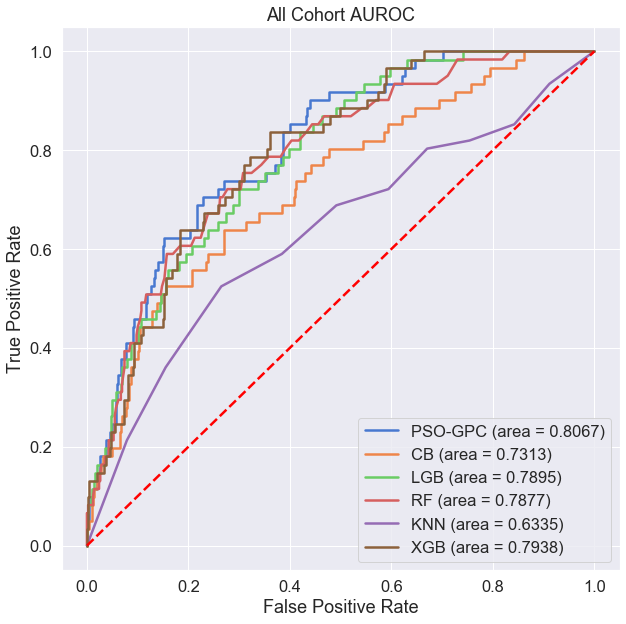

In [62]:
plt.figure(figsize=(10,10))
plt.plot(Gfpr1, Gtpr1, label = 'PSO-GPC (area = %0.4f)' % Gauc1)
plt.plot(Cfpr, Ctpr, label = 'CB (area = %0.4f)' % Cauc)
plt.plot(Lfpr, Ltpr, label = 'LGB (area = %0.4f)' % Lauc)
plt.plot(Rfpr, Rtpr, label = 'RF (area = %0.4f)' % Rauc)
plt.plot(Kfpr, Ktpr, label = 'KNN (area = %0.4f)' % Kauc)
plt.plot(Xfpr, Xtpr, label = 'XGB (area = %0.4f)' % Xauc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('All Cohort AUROC')
plt.legend(loc = 'lower right')
plt.savefig("1All_KPCA.png", format="png")
plt.show()

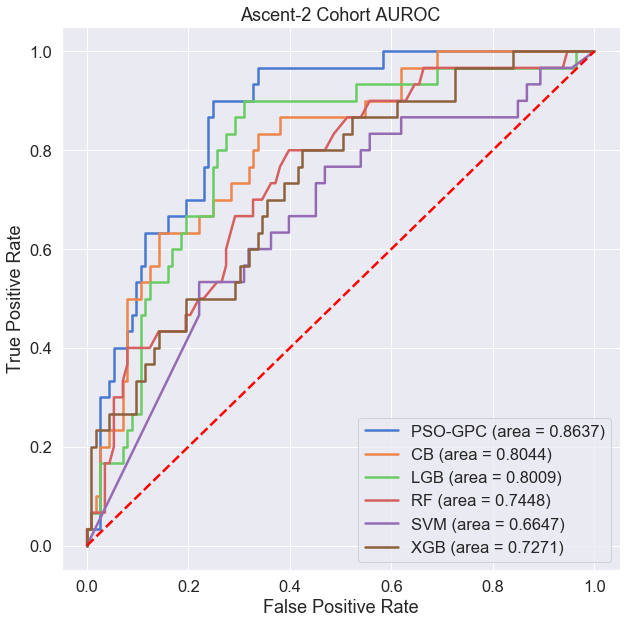

In [63]:
plt.figure(figsize=(10,10))
plt.plot(GAfpr1, GAtpr1, label = 'PSO-GPC (area = %0.4f)' % GAauc1)
plt.plot(CAfpr, CAtpr, label = 'CB (area = %0.4f)' % CAauc)
plt.plot(LAfpr, LAtpr, label = 'LGB (area = %0.4f)' % LAauc)
plt.plot(RAfpr, RAtpr, label = 'RF (area = %0.4f)' % RAauc)
plt.plot(KAfpr, KAtpr, label = 'SVM (area = %0.4f)' % KAauc)
plt.plot(XAfpr, XAtpr, label = 'XGB (area = %0.4f)' % XAauc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ascent-2 Cohort AUROC')
plt.legend(loc = 'lower right')
plt.savefig("1ASCENT_KPCA.png", format="png")
plt.show()

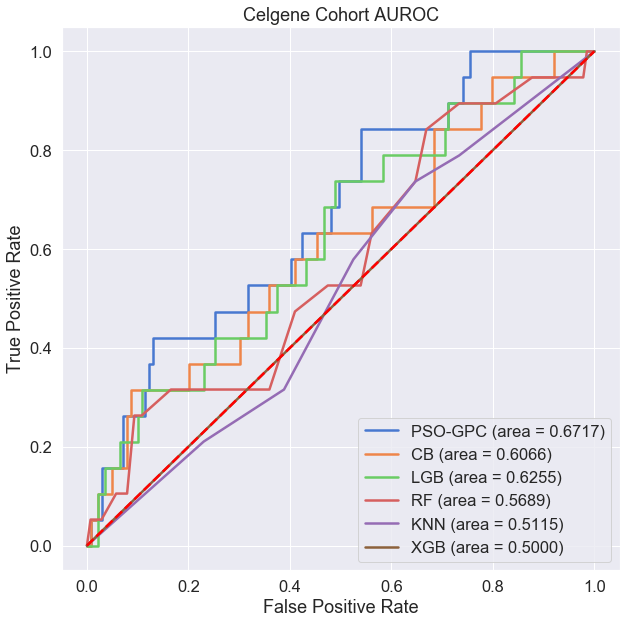

In [66]:
plt.figure(figsize=(10,10))
plt.plot(GCfpr1, GCtpr1, label = 'PSO-GPC (area = %0.4f)' % GCauc1)
plt.plot(CCfpr, CCtpr, label = 'CB (area = %0.4f)' % CCauc)
plt.plot(LCfpr, LCtpr, label = 'LGB (area = %0.4f)' % LCauc)
plt.plot(RCfpr, RCtpr, label = 'RF (area = %0.4f)' % RCauc)
plt.plot(KCfpr, KCtpr, label = 'KNN (area = %0.4f)' % KCauc)
plt.plot(XCfpr, XCtpr, label = 'XGB (area = %0.4f)' % XCauc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Celgene Cohort AUROC')
plt.legend(loc = 'lower right')
plt.savefig("1CELGENE_KPCA.png", format="png")
plt.show()

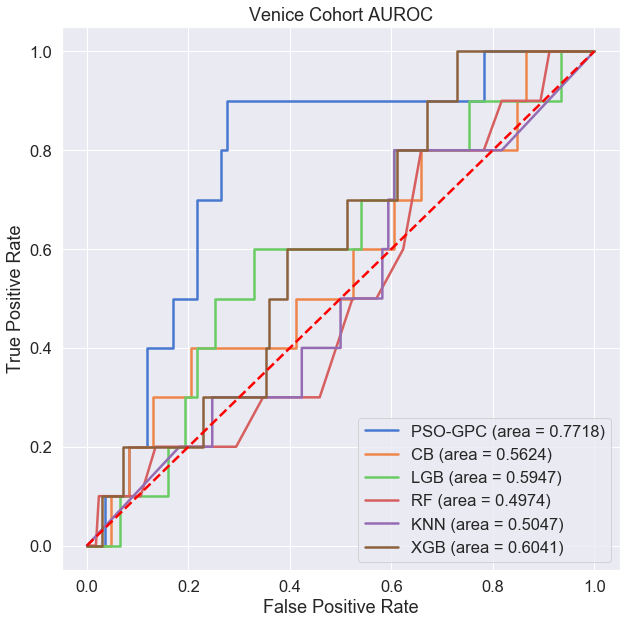

In [65]:
plt.figure(figsize=(10,10))
plt.plot(GVfpr1, GVtpr1, label = 'PSO-GPC (area = %0.4f)' % GVauc1)
plt.plot(CVfpr, CVtpr, label = 'CB (area = %0.4f)' % CVauc)
plt.plot(LVfpr, LVtpr, label = 'LGB (area = %0.4f)' % LVauc)
plt.plot(RVfpr, RVtpr, label = 'RF (area = %0.4f)' % RVauc)
plt.plot(KVfpr, KVtpr, label = 'KNN (area = %0.4f)' % KVauc)
plt.plot(XVfpr, XVtpr, label = 'XGB (area = %0.4f)' % XVauc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Venice Cohort AUROC')
plt.legend(loc = 'lower right')
plt.savefig("1VENICE_KPCA.png", format="png")
plt.show()

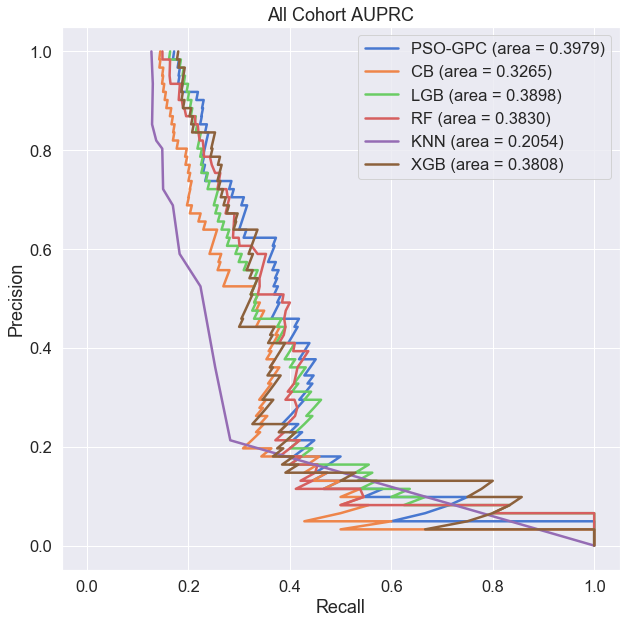

In [67]:
plt.figure(figsize=(10,10))
plt.plot(Gr1, Gp1, label = 'PSO-GPC (area = %0.4f)' % Gauprc1)
plt.plot(Cr, Cp, label = 'CB (area = %0.4f)' % Cauprc)
plt.plot(Lr, Lp, label = 'LGB (area = %0.4f)' % Lauprc)
plt.plot(Rr, Rp, label = 'RF (area = %0.4f)' % Rauprc)
plt.plot(Kr, Kp, label = 'KNN (area = %0.4f)' % Kauprc)
plt.plot(Xr, Xp, label = 'XGB (area = %0.4f)' % Xauprc)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('All Cohort AUPRC')
plt.legend(loc = 'upper right')
plt.savefig("1All_KPCAprc.png", format="png")
plt.show()

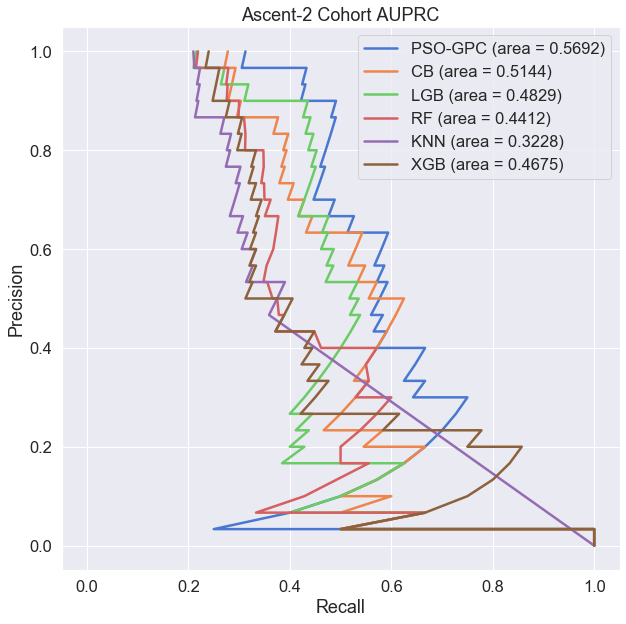

In [68]:
plt.figure(figsize=(10,10))
plt.plot(GAr1, GAp1, label = 'PSO-GPC (area = %0.4f)' % GAauprc1)
plt.plot(CAr, CAp, label = 'CB (area = %0.4f)' % CAauprc)
plt.plot(LAr, LAp, label = 'LGB (area = %0.4f)' % LAauprc)
plt.plot(RAr, RAp, label = 'RF (area = %0.4f)' % RAauprc)
plt.plot(KAr, KAp, label = 'KNN (area = %0.4f)' % KAauprc)
plt.plot(XAr, XAp, label = 'XGB (area = %0.4f)' % XAauprc)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ascent-2 Cohort AUPRC')
plt.legend(loc = 'upper right')
plt.savefig("1ASCENT_KPCAprc.png", format="png")
plt.show()

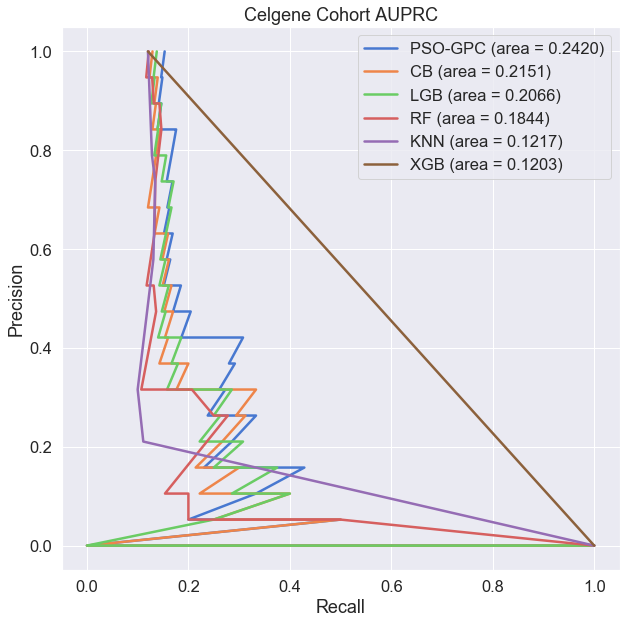

In [69]:
plt.figure(figsize=(10,10))
plt.plot(GCr1, GCp1, label = 'PSO-GPC (area = %0.4f)' % GCauprc1)
plt.plot(CCr, CCp, label = 'CB (area = %0.4f)' % CCauprc)
plt.plot(LCr, LCp, label = 'LGB (area = %0.4f)' % LCauprc)
plt.plot(RCr, RCp, label = 'RF (area = %0.4f)' % RCauprc)
plt.plot(KCr, KCp, label = 'KNN (area = %0.4f)' % KCauprc)
plt.plot(XCr, XCp, label = 'XGB (area = %0.4f)' % XCauprc)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Celgene Cohort AUPRC')
plt.legend(loc = 'upper right')
plt.savefig("1CELGENE_KPCAprc.png", format="png")
plt.show()

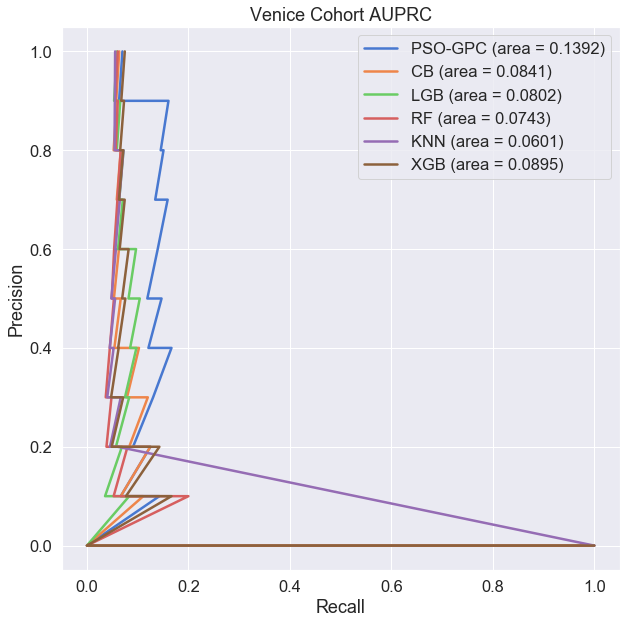

In [72]:
plt.figure(figsize=(10,10))
plt.plot(GVr1, GVp1, label = 'PSO-GPC (area = %0.4f)' % GVauprc1)
plt.plot(CVr, CVp, label = 'CB (area = %0.4f)' % CVauprc)
plt.plot(LVr, LVp, label = 'LGB (area = %0.4f)' % LVauprc)
plt.plot(RVr, RVp, label = 'RF (area = %0.4f)' % RVauprc)
plt.plot(KVr, KVp, label = 'KNN (area = %0.4f)' % KVauprc)
plt.plot(XVr, XVp, label = 'XGB (area = %0.4f)' % XVauprc)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Venice Cohort AUPRC')
plt.legend(loc = 'upper right')
plt.savefig("1VENICE_KPCAprc.png", format="png")
plt.show()

In [52]:
opt = "PSO"

In [53]:
def optimizer(obj_func, initial_theta, bounds):
    
    if opt == "CMA-ES":
        initial_theta = initial_theta.tolist()
        xopts, es = cma.fmin(obj_func, initial_theta, sigma0=0.01, restarts=1)
        theta_opt = xopts
        func_min = es.fopt

    elif opt == "PSO":
        # model = PSO(obj_func, initial_theta, bounds, num_particles=15, maxiter=30)
        # theta_opt, func_min = model.optimize()

        model = PSO()
        theta_opt, func_min = model.optimize(
            obj_func, initial_theta, bounds, num_particles=100, maxiter=30)

    elif opt == "COBYLA" or "SLSQP" or "Nelder-Mead" or "Powell" or "BFGS" or "L-BFGS-B" or "TNC":
        # initial_theta = initial_theta.tolist()
        res = minimize(obj_func, initial_theta,
                       method=opt, jac=True, bounds=bounds)
        theta_opt = res.x
        func_min = res.fun

    return theta_opt, func_min

In [54]:
from sklearn.gaussian_process.kernels import RBF

In [58]:
Kernel = 1.0 * RBF(1.0)
parameter = {'n_restarts_optimizer': [0], 'max_iter_predict': [100], 
             'warm_start':[True], 'multi_class':['one_vs_rest'], 'random_state': [42]}
eGPC1 = model_selection.GridSearchCV(gaussian_process.GaussianProcessClassifier(kernel=Kernel, optimizer=optimizer),
                                    parameter, cv=5, n_jobs=-1)
eGPC1.fit(train, trainY)

Gmodel1 = eGPC1.predict_proba(test)   
    
Gauc1  = metrics.roc_auc_score(testY, Gmodel1[:,1])
Gfpr1, Gtpr1, Gthresholds2 = metrics.roc_curve(testY, Gmodel1[:,1])
Gauprc1  = metrics.average_precision_score(testY, Gmodel1[:,1])
Gr1, Gp1, Gthresholds11 = metrics.precision_recall_curve(testY, Gmodel1[:,1])
    
print('AUC: ', Gauc1, 'AUPRC: ', Gauprc1)
print(eGPC1.best_params_)

###### error ########
946.380737847327
##############
###### error ########
946.3807378473266
##############
###### error ########
946.380737847327
##############
###### error ########
946.3807378473269
##############
###### error ########
946.3807378473268
##############
###### error ########
946.3807378473267
##############
###### error ########
946.3807378473272
##############
###### error ########
946.3807378473275
##############
###### error ########
946.3807378473267
##############
###### error ########
946.3807378473268
##############
###### error ########
946.380737847327
##############
###### error ########
946.3807378473268
##############
###### error ########
946.3807378473268
##############
###### error ########
946.3807378473263
##############
###### error ########
946.3807378473269
##############
###### error ########
946.3807378473272
##############
###### error ########
946.3807378473266
##############
###### error ########
946.3807378473272
##############
###### error 

###### error ########
1018.2216811218799
##############
###### error ########
954.6137809461028
##############
###### error ########
837.280178802187
##############
###### error ########
1090.5414387972462
##############
###### error ########
900.8769607891616
##############
###### error ########
932.9811067012814
##############
###### error ########
903.7649908603728
##############
###### error ########
1029.060765111769
##############
###### error ########
1000.2780367198101
##############
###### error ########
945.1454951193376
##############
###### error ########
859.3127837312777
##############
###### error ########
914.8091586147694
##############
###### error ########
1067.1480102742378
##############
###### error ########
1004.1324477869903
##############
###### error ########
901.1414596844382
##############
###### error ########
912.0512605715978
##############
###### error ########
994.828915805822
##############
###### error ########
838.9834739514629
##############
###### 

###### error ########
762.5894069656938
##############
###### error ########
719.1150535531001
##############
###### error ########
966.2548135862389
##############
###### error ########
686.5673146302415
##############
###### error ########
753.2259320584888
##############
###### error ########
923.7905121019379
##############
###### error ########
957.1225670404988
##############
###### error ########
784.3597534194435
##############
###### error ########
684.604543745503
##############
###### error ########
834.0837852724371
##############
###### error ########
661.9402668603276
##############
###### error ########
890.9677398852664
##############
###### error ########
779.6757849455969
##############
###### error ########
667.1608959526211
##############
###### error ########
864.8545082278057
##############
###### error ########
674.4087428947672
##############
###### error ########
694.9512193408956
##############
###### error ########
730.7560950771366
##############
###### erro

###### error ########
595.4985792657621
##############
###### error ########
635.582034747044
##############
###### error ########
789.0644641424823
##############
###### error ########
786.3021451580031
##############
###### error ########
755.5613149900157
##############
###### error ########
649.2342894573798
##############
###### error ########
738.4177391440845
##############
###### error ########
674.3726389267119
##############
###### error ########
689.7793610642261
##############
###### error ########
602.5320904854264
##############
###### error ########
668.8820041944915
##############
###### error ########
738.8228004388292
##############
###### error ########
634.0669011436454
##############
###### error ########
669.9957705208584
##############
###### error ########
856.1572267526748
##############
###### error ########
640.5514521168699
##############
###### error ########
719.1077059540085
##############
###### error ########
813.854948127073
##############
###### error

###### error ########
576.1447411921234
##############
###### error ########
580.3017312526522
##############
###### error ########
566.7862648269486
##############
###### error ########
599.0135280211234
##############
###### error ########
615.0349372981448
##############
###### error ########
832.9383619477278
##############
###### error ########
564.4880268438369
##############
###### error ########
560.9269703007
##############
###### error ########
573.9799241165383
##############
###### error ########
579.7460608441414
##############
###### error ########
573.8434502174914
##############
###### error ########
557.1100576190524
##############
###### error ########
563.4015735012273
##############
###### error ########
575.4146401248688
##############
###### error ########
584.4830966436207
##############
###### error ########
636.6981268919047
##############
###### error ########
551.0849164340184
##############
###### error ########
552.4464058051335
##############
###### error 

###### error ########
555.6175223131806
##############
###### error ########
561.4959450789993
##############
###### error ########
586.6933917186254
##############
###### error ########
628.98808556666
##############
###### error ########
593.962715295258
##############
###### error ########
577.7530605024638
##############
###### error ########
582.3586239717737
##############
###### error ########
546.8129790350073
##############
###### error ########
542.4430437017586
##############
###### error ########
532.5826982602903
##############
###### error ########
550.5221245461498
##############
###### error ########
533.7613432202764
##############
###### error ########
526.1237782186412
##############
###### error ########
517.284617846198
##############
###### error ########
544.0032954699224
##############
###### error ########
556.7130478257759
##############
###### error ########
530.4042250171246
##############
###### error ########
508.25696186604404
##############
###### error 

###### error ########
549.0714109514886
##############
###### error ########
544.8035192200759
##############
###### error ########
571.1595679566327
##############
###### error ########
545.1605783132429
##############
###### error ########
555.6459633222746
##############
###### error ########
554.0193297474716
##############
###### error ########
559.6854531443594
##############
###### error ########
557.1649133348689
##############
###### error ########
554.7021361439995
##############
###### error ########
556.8126636940801
##############
###### error ########
559.7163287409853
##############
###### error ########
546.4330033569705
##############
###### error ########
581.3878514996724
##############
###### error ########
564.8995091918093
##############
###### error ########
561.0002456871612
##############
###### error ########
552.9459045223591
##############
###### error ########
533.8450059657582
##############
###### error ########
549.2125036435657
##############
###### err

###### error ########
554.4426285936711
##############
###### error ########
546.3547918170686
##############
###### error ########
536.1481762572658
##############
###### error ########
534.4717979779521
##############
###### error ########
580.5225838623693
##############
###### error ########
552.6194103081033
##############
###### error ########
547.9694719857995
##############
###### error ########
581.2147333860786
##############
###### error ########
549.1949093764929
##############
###### error ########
539.8361873563963
##############
###### error ########
571.4283017152545
##############
###### error ########
558.4290441090691
##############
###### error ########
544.3368376472695
##############
###### error ########
536.8301497438451
##############
###### error ########
549.9255045383605
##############
###### error ########
552.1189309195526
##############
###### error ########
542.916329372575
##############
###### error ########
558.9401488514022
##############
###### erro

###### error ########
534.3576120172726
##############
###### error ########
543.2786905632229
##############
###### error ########
539.6219291093928
##############
###### error ########
544.5302166199104
##############
###### error ########
556.4373085231514
##############
###### error ########
553.8702219406122
##############
###### error ########
563.3944288026817
##############
###### error ########
555.2964194212227
##############
###### error ########
553.5652065761217
##############
###### error ########
552.4621464763019
##############
###### error ########
557.0923786918545
##############
###### error ########
538.4158646624076
##############
###### error ########
526.506102708358
##############
###### error ########
546.2804584655829
##############
###### error ########
533.0842648251995
##############
###### error ########
557.5506347331636
##############
###### error ########
555.9870213614929
##############
###### error ########
541.6984070578387
##############
###### erro

###### error ########
553.8261254719503
##############
###### error ########
545.9739421941324
##############
###### error ########
557.3318894599817
##############
###### error ########
526.4351285237415
##############
###### error ########
502.8734537343498
##############
###### error ########
555.5185269894537
##############
###### error ########
552.1470450623907
##############
###### error ########
558.5925695605753
##############
###### error ########
544.689539338239
##############
###### error ########
532.4580658127614
##############
###### error ########
560.5176122203939
##############
###### error ########
557.370608005161
##############
###### error ########
555.5465362162008
##############
###### error ########
559.0807892062893
##############
###### error ########
556.5878609021856
##############
###### error ########
556.7853204207315
##############
###### error ########
549.0854001804365
##############
###### error ########
554.281173133638
##############
###### error 

###### error ########
629.1231259507772
##############
###### error ########
576.375974660294
##############
###### error ########
553.573082419658
##############
###### error ########
564.4574672788269
##############
###### error ########
599.4593203508566
##############
###### error ########
627.921787196937
##############
###### error ########
583.8425593253858
##############
###### error ########
580.5235746600817
##############
###### error ########
559.3696344640431
##############
###### error ########
560.0112631453044
##############
###### error ########
562.8367832023472
##############
###### error ########
588.7302128792844
##############
###### error ########
559.2314430652552
##############
###### error ########
564.4469192476954
##############
###### error ########
544.7056104475906
##############
###### error ########
559.2527208202793
##############
###### error ########
562.7040767252267
##############
###### error ########
551.4952212360033
##############
###### error 

###### error ########
557.388505110504
##############
###### error ########
572.6276285578434
##############
###### error ########
563.6588141250104
##############
###### error ########
548.1703631051128
##############
###### error ########
506.1235884912361
##############
###### error ########
552.715439690035
##############
###### error ########
543.7455840843877
##############
###### error ########
552.1793360922433
##############
###### error ########
571.7337722404053
##############
###### error ########
585.9220982272933
##############
###### error ########
545.7037219626783
##############
###### error ########
573.7458208844874
##############
###### error ########
540.2844270323351
##############
###### error ########
557.9923277084536
##############
###### error ########
557.5406742296079
##############
###### error ########
566.6369624992726
##############
###### error ########
546.2123087669796
##############
###### error ########
556.5463701418159
##############
###### error

###### error ########
546.9587124831619
##############
###### error ########
560.4183801316183
##############
###### error ########
549.0253516422445
##############
###### error ########
652.9090492115248
##############
###### error ########
567.7042722854344
##############
###### error ########
545.6434525204259
##############
###### error ########
519.7157516875311
##############
###### error ########
559.415461390515
##############
###### error ########
557.8887096319086
##############
###### error ########
730.6941935410784
##############
###### error ########
581.9382283418536
##############
###### error ########
635.8763147114568
##############
###### error ########
574.0105411696918
##############
###### error ########
558.1896002121691
##############
###### error ########
549.2952177752938
##############
###### error ########
572.7931403443179
##############
###### error ########
583.5172168142087
##############
###### error ########
554.9495730467554
##############
###### erro

###### error ########
574.4108001742285
##############
###### error ########
561.4999639514772
##############
###### error ########
560.6728459437164
##############
###### error ########
555.6786790600298
##############
###### error ########
546.5292841168847
##############
###### error ########
573.3520195713108
##############
###### error ########
540.2704003206535
##############
###### error ########
607.1289698705823
##############
###### error ########
554.9743259935649
##############
###### error ########
541.6865922020393
##############
###### error ########
555.2443311753865
##############
###### error ########
537.5526477145789
##############
###### error ########
530.1755774260896
##############
###### error ########
478.31846457262816
##############
###### error ########
571.8300101229188
##############
###### error ########
520.1880871935396
##############
###### error ########
557.069814393482
##############
###### error ########
570.9924398255185
##############
###### err

###### error ########
551.9966066683274
##############
###### error ########
564.3111909105635
##############
###### error ########
587.9891356454941
##############
###### error ########
569.685138715105
##############
###### error ########
548.0717151477875
##############
###### error ########
552.5542306593337
##############
###### error ########
536.4745313750592
##############
###### error ########
564.50129429746
##############
###### error ########
559.8245083203375
##############
###### error ########
596.4402625295882
##############
###### error ########
595.1864796948803
##############
###### error ########
544.5126785210895
##############
###### error ########
509.2330703476308
##############
###### error ########
556.0022593231913
##############
###### error ########
552.6642113371206
##############
###### error ########
553.1052413835456
##############
###### error ########
556.211776817895
##############
###### error ########
562.0386270488211
##############
###### error #

###### error ########
541.6306898264025
##############
###### error ########
563.3668168266906
##############
###### error ########
559.6061147054745
##############
###### error ########
554.2467945858702
##############
###### error ########
541.1723770806223
##############
###### error ########
555.1146426498649
##############
###### error ########
560.981465683214
##############
###### error ########
565.5132977933122
##############
###### error ########
549.697105952782
##############
###### error ########
534.1369520861176
##############
###### error ########
539.4787702025505
##############
###### error ########
508.03370562267963
##############
###### error ########
594.3021741605726
##############
###### error ########
579.3922503818429
##############
###### error ########
551.4775081044272
##############
###### error ########
560.5349650821533
##############
###### error ########
568.3451765151775
##############
###### error ########
543.9486670398974
##############
###### erro

###### error ########
532.0416024870771
##############
###### error ########
547.7387042020699
##############
###### error ########
534.5473574303751
##############
###### error ########
520.4695706454771
##############
###### error ########
558.2372857402262
##############
###### error ########
544.0656600073964
##############
###### error ########
522.0619691910358
##############
###### error ########
554.905740937502
##############
###### error ########
554.0178112868039
##############
###### error ########
556.4832989747084
##############
###### error ########
565.1584488970216
##############
###### error ########
532.5468562488826
##############
###### error ########
510.1531172610409
##############
###### error ########
551.6923359581681
##############
###### error ########
564.7167049968305
##############
###### error ########
551.3139379387302
##############
###### error ########
559.8391901641302
##############
###### error ########
556.5613549565953
##############
###### erro

###### error ########
561.7271952200695
##############
###### error ########
554.0604881612061
##############
###### error ########
562.2900707526817
##############
###### error ########
550.1508508192661
##############
###### error ########
528.2071691345358
##############
###### error ########
559.5869850161372
##############
###### error ########
561.0655032511188
##############
###### error ########
559.0559121909828
##############
###### error ########
561.8401587747426
##############
###### error ########
565.3155426945677
##############
###### error ########
558.2680813007362
##############
###### error ########
559.2244274853128
##############
###### error ########
554.4361859562141
##############
###### error ########
528.3884847697748
##############
###### error ########
575.185566301823
##############
###### error ########
563.7518529133426
##############
###### error ########
592.6413005082447
##############
###### error ########
537.8085908105987
##############
###### erro

###### error ########
562.3283848117969
##############
###### error ########
549.7900352606432
##############
###### error ########
547.0717905157676
##############
###### error ########
544.1326210941618
##############
###### error ########
554.9784198519496
##############
###### error ########
559.2239665913897
##############
###### error ########
547.0006188773509
##############
###### error ########
559.2622971371912
##############
###### error ########
559.9187351203631
##############
###### error ########
557.2674926730576
##############
###### error ########
569.5752860702013
##############
###### error ########
545.3625438135139
##############
###### error ########
563.2675313523418
##############
###### error ########
553.4175046960178
##############
###### error ########
562.6936680079322
##############
###### error ########
548.4304377893549
##############
###### error ########
561.2927602378898
##############
###### error ########
565.2328962011718
##############
###### err

###### error ########
529.0480978211933
##############
###### error ########
556.2570121254236
##############
###### error ########
559.4768265786229
##############
###### error ########
550.1499283978906
##############
###### error ########
518.3320095352889
##############
###### error ########
558.9093533120645
##############
###### error ########
549.8617844096566
##############
###### error ########
563.3263302645494
##############
###### error ########
561.8887006187613
##############
###### error ########
559.6020872408503
##############
###### error ########
516.0131851662609
##############
###### error ########
468.7811054669645
##############
###### error ########
546.3410406356693
##############
###### error ########
531.5606468528747
##############
###### error ########
556.1073207290434
##############
###### error ########
546.0250832854194
##############
###### error ########
559.4463012716326
##############
###### error ########
550.6567775649138
##############
###### err

###### error ########
562.9405906495292
##############
AUC:  0.8067217027270237 AUPRC:  0.39792239745898456
{'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_restarts_optimizer': 0, 'random_state': 42, 'warm_start': True}


In [55]:
parameter = {'n_restarts_optimizer': [0], 'max_iter_predict': [100], 
             'warm_start':[True], 'multi_class':['one_vs_rest'], 'random_state': [42]}
aGPC1 = model_selection.GridSearchCV(gaussian_process.GaussianProcessClassifier(kernel=Kernel, optimizer=optimizer),
                                    parameter, cv=5, n_jobs=-1)
aGPC1.fit(Atrain, AtrainY)
GAmodel1 = aGPC1.predict_proba(Atest)   
    
GAauc1  = metrics.roc_auc_score(AtestY, GAmodel1[:,1])
GAfpr1, GAtpr1, GAthresholds2 = metrics.roc_curve(AtestY, GAmodel1[:,1])
GAauprc1  = metrics.average_precision_score(AtestY, GAmodel1[:,1])
GAr1, GAp1, GAthresholds11 = metrics.precision_recall_curve(AtestY, GAmodel1[:,1])
    
print('AUC: ', GAauc1, 'AUPRC: ', GAauprc1)
print(aGPC1.best_params_)

###### error ########
308.67342876872164
##############
###### error ########
308.6734287687216
##############
###### error ########
308.67342876872164
##############
###### error ########
308.6734287687215
##############
###### error ########
308.67342876872164
##############
###### error ########
308.67342876872164
##############
###### error ########
308.6734287687215
##############
###### error ########
308.67342876872164
##############
###### error ########
308.6734287687216
##############
###### error ########
308.6734287687216
##############
###### error ########
308.6734287687216
##############
###### error ########
308.6734287687216
##############
###### error ########
308.67342876872164
##############
###### error ########
308.67342876872164
##############
###### error ########
308.67342876872164
##############
###### error ########
308.6734287687216
##############
###### error ########
308.6734287687216
##############
###### error ########
308.67342876872164
##############
#

###### error ########
309.82359373532626
##############
###### error ########
325.1902777757397
##############
###### error ########
307.16702206960906
##############
###### error ########
332.7900089848373
##############
###### error ########
304.75433907825925
##############
###### error ########
305.9666629440044
##############
###### error ########
316.90194343158544
##############
###### error ########
289.7891371517365
##############
###### error ########
319.48902743022785
##############
###### error ########
304.49222159424824
##############
###### error ########
305.4415060226478
##############
###### error ########
330.89739485369563
##############
###### error ########
305.54927798444425
##############
###### error ########
305.00601629674463
##############
###### error ########
311.13598110126867
##############
###### error ########
313.9049432015031
##############
###### error ########
300.29796723786956
##############
###### error ########
305.64644010655275
#############

###### error ########
257.2485335113742
##############
###### error ########
234.54722567014315
##############
###### error ########
238.53475220084647
##############
###### error ########
229.56232928859347
##############
###### error ########
246.60738429440244
##############
###### error ########
266.8917720181268
##############
###### error ########
228.05956776235035
##############
###### error ########
238.32799727269642
##############
###### error ########
234.27223163864954
##############
###### error ########
242.70379186950393
##############
###### error ########
236.09471270808086
##############
###### error ########
268.40391196615866
##############
###### error ########
231.13313900588662
##############
###### error ########
234.45608736088585
##############
###### error ########
235.10171890471025
##############
###### error ########
260.38045448533455
##############
###### error ########
234.44890132946196
##############
###### error ########
284.713474357936
###########

###### error ########
254.18898490270237
##############
###### error ########
245.76718995936685
##############
###### error ########
222.45291745065117
##############
###### error ########
228.15021846519153
##############
###### error ########
235.1559033760874
##############
###### error ########
229.10663049763252
##############
###### error ########
226.55676008227317
##############
###### error ########
233.4628140761157
##############
###### error ########
248.12803830510958
##############
###### error ########
242.7441609531288
##############
###### error ########
231.00867989782142
##############
###### error ########
226.78561649071816
##############
###### error ########
245.60052451265554
##############
###### error ########
238.31745063561212
##############
###### error ########
230.30157840649025
##############
###### error ########
230.11108078600788
##############
###### error ########
237.06940291952975
##############
###### error ########
225.77788011261916
##########

###### error ########
221.0120945927042
##############
###### error ########
225.36546825048325
##############
###### error ########
219.93123926904775
##############
###### error ########
222.99709077737796
##############
###### error ########
230.03830635098535
##############
###### error ########
234.40987096162897
##############
###### error ########
225.86905249369732
##############
###### error ########
233.2522795962393
##############
###### error ########
216.69231083293022
##############
###### error ########
219.60863860792057
##############
###### error ########
222.6359157559765
##############
###### error ########
222.34066999835306
##############
###### error ########
225.57087581867623
##############
###### error ########
221.907011808919
##############
###### error ########
265.0014665343026
##############
###### error ########
229.51262722142297
##############
###### error ########
226.51749408391248
##############
###### error ########
225.37180447227666
#############

###### error ########
225.3648533643265
##############
###### error ########
228.65510862972937
##############
###### error ########
229.23290216323818
##############
###### error ########
224.87941865696456
##############
###### error ########
225.4195328975998
##############
###### error ########
227.5443740218848
##############
###### error ########
225.96867277801496
##############
###### error ########
224.18841155531595
##############
###### error ########
225.04183856597578
##############
###### error ########
234.72492759832485
##############
###### error ########
228.73701549788234
##############
###### error ########
225.61100286826405
##############
###### error ########
231.2140266679874
##############
###### error ########
229.82277405487054
##############
###### error ########
225.77845458135093
##############
###### error ########
227.9576353906571
##############
###### error ########
222.89956186340902
##############
###### error ########
220.02115053499543
############

###### error ########
236.17277151536845
##############
###### error ########
223.7860008804339
##############
###### error ########
217.1391265839022
##############
###### error ########
223.50075712495726
##############
###### error ########
223.83108643152536
##############
###### error ########
219.4227312028054
##############
###### error ########
220.29978587885086
##############
###### error ########
224.38795301998488
##############
###### error ########
222.29538322724827
##############
###### error ########
224.91570861197044
##############
###### error ########
228.09075279388702
##############
###### error ########
221.65847922115313
##############
###### error ########
224.53990041739053
##############
###### error ########
219.77050557329932
##############
###### error ########
230.05785574815314
##############
###### error ########
224.15625154103745
##############
###### error ########
223.63313033622353
##############
###### error ########
221.29026505225232
##########

###### error ########
196.43023222280345
##############
###### error ########
187.59304550084312
##############
###### error ########
219.07570597806733
##############
###### error ########
218.26545975903224
##############
###### error ########
199.1008115684341
##############
###### error ########
173.38122411222665
##############
###### error ########
199.7721752491306
##############
###### error ########
181.08206760656492
##############
###### error ########
191.2832199325677
##############
###### error ########
210.49039218941485
##############
###### error ########
198.29204143452296
##############
###### error ########
174.98244624335825
##############
###### error ########
202.51649126567204
##############
###### error ########
194.1106047654925
##############
###### error ########
201.63041027946662
##############
###### error ########
177.67210566594196
##############
###### error ########
207.79177902433614
##############
###### error ########
210.00334563222123
###########

###### error ########
197.87297604487975
##############
###### error ########
204.59894699950897
##############
###### error ########
150.29834792979386
##############
###### error ########
175.91640000021337
##############
###### error ########
179.54597268725541
##############
###### error ########
198.2051172974134
##############
###### error ########
203.43601838577064
##############
###### error ########
148.99741348415463
##############
###### error ########
196.15048420732649
##############
###### error ########
145.73006553701816
##############
###### error ########
198.0537441755937
##############
###### error ########
188.0257498092865
##############
###### error ########
198.26276612642704
##############
###### error ########
167.305988187983
##############
###### error ########
197.0476861147747
##############
###### error ########
203.62372260854514
##############
###### error ########
196.6800519332788
##############
###### error ########
198.90853216061785
##############

###### error ########
143.6291177376864
##############
###### error ########
196.66398007661638
##############
###### error ########
196.27430278323254
##############
###### error ########
164.898081754625
##############
###### error ########
206.9401504099198
##############
###### error ########
196.59368841244225
##############
###### error ########
198.00678239732002
##############
###### error ########
138.4683492566018
##############
###### error ########
196.50322141636704
##############
###### error ########
196.4044381489683
##############
###### error ########
160.187433768703
##############
###### error ########
163.22333134484072
##############
###### error ########
196.0313747398212
##############
###### error ########
184.9084328285967
##############
###### error ########
170.9584948127601
##############
###### error ########
195.80502716325375
##############
###### error ########
184.27519055300587
##############
###### error ########
196.84092570306288
##############
###

###### error ########
139.6399533419759
##############
###### error ########
195.59483908641488
##############
###### error ########
159.23613205562538
##############
###### error ########
198.0214565001029
##############
###### error ########
159.8778086064964
##############
###### error ########
196.76247252712614
##############
###### error ########
199.38626217546613
##############
###### error ########
196.60419589641756
##############
###### error ########
197.07274814186923
##############
###### error ########
186.05993697366847
##############
###### error ########
199.4284121120338
##############
###### error ########
134.40563239347517
##############
###### error ########
195.93339266092119
##############
###### error ########
199.1742508068991
##############
###### error ########
146.10725279476978
##############
###### error ########
202.93765742999335
##############
###### error ########
181.28607394960338
##############
###### error ########
186.05475707055894
############

###### error ########
192.34403379969189
##############
###### error ########
197.47955818173952
##############
###### error ########
196.84179466299133
##############
###### error ########
201.13529619539923
##############
###### error ########
136.0113919829476
##############
###### error ########
197.29788569653553
##############
###### error ########
199.82104051483546
##############
###### error ########
136.3341197180489
##############
###### error ########
197.32070082277073
##############
###### error ########
178.42474968797634
##############
###### error ########
200.0533060889689
##############
###### error ########
144.2891356020211
##############
###### error ########
191.35144923744508
##############
###### error ########
197.46516209809664
##############
###### error ########
143.41277684963808
##############
###### error ########
187.57127744980988
##############
###### error ########
199.11389876107538
##############
###### error ########
175.91908552051058
###########

###### error ########
198.5595916728297
##############
###### error ########
147.1069687004666
##############
###### error ########
197.05202383552424
##############
###### error ########
198.43561705428806
##############
###### error ########
148.8492227325226
##############
###### error ########
196.8633309374884
##############
###### error ########
148.89917785990005
##############
###### error ########
196.74332629006332
##############
###### error ########
198.62612180939465
##############
###### error ########
149.20354402444104
##############
###### error ########
196.89636509609855
##############
###### error ########
193.6413133246212
##############
###### error ########
197.33195648499523
##############
###### error ########
178.41752662820187
##############
###### error ########
197.69171646019822
##############
###### error ########
143.7649650879635
##############
###### error ########
196.8794790346515
##############
###### error ########
173.3647082325255
##############


###### error ########
183.27184934261274
##############
###### error ########
151.66514267750645
##############
###### error ########
197.33262775841303
##############
###### error ########
192.65499283043627
##############
###### error ########
182.4173028757628
##############
###### error ########
153.72442888789254
##############
###### error ########
198.23205627854506
##############
###### error ########
172.7059706001748
##############
###### error ########
182.73810960378933
##############
###### error ########
207.5572392068624
##############
###### error ########
129.54976388567883
##############
###### error ########
182.28762920354401
##############
###### error ########
183.20085482719375
##############
###### error ########
195.46577926467458
##############
###### error ########
181.01956191463927
##############
###### error ########
196.6536860086538
##############
###### error ########
198.0436092193875
##############
###### error ########
145.95646538381877
############

###### error ########
197.2192831614063
##############
###### error ########
185.4826148893372
##############
###### error ########
196.52612113421122
##############
###### error ########
196.36687151083405
##############
###### error ########
141.6405111478993
##############
###### error ########
197.21938621132784
##############
###### error ########
169.09170584682752
##############
###### error ########
197.7029280144454
##############
###### error ########
197.54652950486604
##############
###### error ########
139.50903638600067
##############
###### error ########
197.2284209644413
##############
###### error ########
163.7829355993361
##############
###### error ########
196.50722264749925
##############
###### error ########
150.70427784388414
##############
###### error ########
196.84216015325435
##############
###### error ########
155.4440236162999
##############
###### error ########
186.14617015116158
##############
###### error ########
205.53281828854324
##############

###### error ########
198.11140192159527
##############
###### error ########
142.14256470605062
##############
###### error ########
196.7366872500384
##############
###### error ########
197.72565013635284
##############
###### error ########
169.3391080467579
##############
###### error ########
169.09237424229437
##############
###### error ########
196.16296600880494
##############
###### error ########
196.94464381673154
##############
###### error ########
162.72566634380718
##############
###### error ########
176.9041610853023
##############
###### error ########
198.3452011864028
##############
###### error ########
180.3944135299772
##############
###### error ########
189.86609834981468
##############
###### error ########
183.59383170500132
##############
###### error ########
197.007460590461
##############
###### error ########
178.26311286419707
##############
###### error ########
185.39066368012874
##############
###### error ########
179.7895304084116
##############


###### error ########
196.30989697476411
##############
###### error ########
196.27598083173822
##############
###### error ########
197.53050271273258
##############
###### error ########
188.6714394260792
##############
###### error ########
165.35307628669744
##############
###### error ########
196.2304037710668
##############
###### error ########
197.01245139090076
##############
###### error ########
192.7715810529804
##############
###### error ########
198.5587053797094
##############
###### error ########
194.8029738881263
##############
###### error ########
197.91292972066685
##############
###### error ########
199.65270900517285
##############
###### error ########
169.0904263671476
##############
###### error ########
171.49319946842547
##############
###### error ########
197.78969993112474
##############
###### error ########
194.77194477970278
##############
###### error ########
173.91447375111687
##############
###### error ########
199.47201802722827
#############

###### error ########
141.27306276748766
##############
###### error ########
199.29645107810936
##############
###### error ########
146.22018044244444
##############
###### error ########
155.2471824286663
##############
###### error ########
197.41649035739698
##############
###### error ########
172.19802875718287
##############
###### error ########
196.7256515939066
##############
###### error ########
198.22088692132388
##############
###### error ########
162.02270467209001
##############
###### error ########
177.28868504740274
##############
###### error ########
197.67932798862006
##############
###### error ########
168.1382370232193
##############
###### error ########
196.83648586836634
##############
###### error ########
188.713980839514
##############
###### error ########
189.24596887124858
##############
###### error ########
187.26900248946805
##############
###### error ########
196.30181815473634
##############
###### error ########
196.83665450367818
############

###### error ########
198.3510562366206
##############
###### error ########
165.0448400043175
##############
###### error ########
202.1058367005552
##############
###### error ########
142.70572371225563
##############
###### error ########
196.32904675605943
##############
###### error ########
192.85980070699608
##############
###### error ########
198.827292245759
##############
###### error ########
153.27229409409742
##############
###### error ########
196.59020053139002
##############
###### error ########
197.23043446460665
##############
###### error ########
174.9161412441142
##############
###### error ########
198.2018918869362
##############
###### error ########
183.29542653115956
##############
###### error ########
157.8686777767474
##############
###### error ########
197.41079229398073
##############
###### error ########
203.16211057997984
##############
###### error ########
138.71947802687157
##############
###### error ########
200.8389285087153
##############
#

###### error ########
181.9532569194161
##############
###### error ########
194.49924826787213
##############
###### error ########
173.4720008053635
##############
###### error ########
189.93865352898817
##############
###### error ########
196.51005393781892
##############
###### error ########
184.5058508500751
##############
###### error ########
196.84920942462782
##############
###### error ########
183.43911489106426
##############
###### error ########
196.1775068727418
##############
###### error ########
187.5248127868536
##############
###### error ########
193.24676026101562
##############
###### error ########
197.3486183156468
##############
AUC:  0.863716814159292 AUPRC:  0.5692155630378736
{'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_restarts_optimizer': 0, 'random_state': 42, 'warm_start': True}


In [56]:
parameter = {'n_restarts_optimizer': [0], 'max_iter_predict': [100], 
             'warm_start':[True], 'multi_class':['one_vs_rest'], 'random_state': [42]}
cGPC1 = model_selection.GridSearchCV(gaussian_process.GaussianProcessClassifier(kernel=Kernel, optimizer=optimizer),
                                    parameter, cv=5, n_jobs=-1)
cGPC1.fit(Ctrain, CtrainY)
GCmodel1 = cGPC1.predict_proba(Ctest)   
    
GCauc1  = metrics.roc_auc_score(CtestY, GCmodel1[:,1])
GCfpr1, GCtpr1, GCthresholds2 = metrics.roc_curve(CtestY, GCmodel1[:,1])
GCauprc1  = metrics.average_precision_score(CtestY, GCmodel1[:,1])
GCr1, GCp1, GCthresholds11 = metrics.precision_recall_curve(CtestY, GCmodel1[:,1])
    
print('AUC: ', GCauc1, 'AUPRC: ', GCauprc1)
print(cGPC1.best_params_)

###### error ########
284.8778151724671
##############
###### error ########
284.87781517245935
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.87781517245924
##############
###### error ########
284.8778151724593
##############
###### error ########
284.8778151724593
##############
###### error ########
284.87781517245935
##############
###### error ########
284.87781517245935
##############
###### error ########
284.87781517245935
##############
###### error ########
284.8778151724593
##############
###### error ########
284.87781517245935
##############
####

###### error ########
263.1231806702877
##############
###### error ########
282.95568913451655
##############
###### error ########
316.69420608524723
##############
###### error ########
272.3292738615858
##############
###### error ########
316.76482027923475
##############
###### error ########
291.88730778876254
##############
###### error ########
271.62920860207714
##############
###### error ########
305.632991525336
##############
###### error ########
305.6611179322989
##############
###### error ########
281.6429705099041
##############
###### error ########
275.0828673756114
##############
###### error ########
315.5947555978326
##############
###### error ########
290.53343086888975
##############
###### error ########
320.14122144084644
##############
###### error ########
249.87764335336897
##############
###### error ########
288.3318617826587
##############
###### error ########
310.9734674521483
##############
###### error ########
308.1782883260216
##############
###

###### error ########
213.57625151746768
##############
###### error ########
221.97197621989034
##############
###### error ########
223.21155690164815
##############
###### error ########
198.15115320768172
##############
###### error ########
251.07004664698317
##############
###### error ########
231.988937123057
##############
###### error ########
184.23035766026632
##############
###### error ########
236.36523379812112
##############
###### error ########
227.8031756431652
##############
###### error ########
252.84497829826233
##############
###### error ########
210.18536144816014
##############
###### error ########
217.0191062347153
##############
###### error ########
277.8316351600664
##############
###### error ########
184.976434190648
##############
###### error ########
206.8275964782439
##############
###### error ########
206.24732899882179
##############
###### error ########
188.6835800434156
##############
###### error ########
247.619715974372
##############
###

###### error ########
185.7801840532391
##############
###### error ########
182.89125795540343
##############
###### error ########
163.23188701749626
##############
###### error ########
199.5281537550269
##############
###### error ########
236.670121892039
##############
###### error ########
189.74833807282488
##############
###### error ########
179.42019287009478
##############
###### error ########
171.43376145733058
##############
###### error ########
163.8626357245547
##############
###### error ########
175.9373534052865
##############
###### error ########
183.28358036424606
##############
###### error ########
165.14952743894355
##############
###### error ########
248.5631622816639
##############
###### error ########
159.06605805232505
##############
###### error ########
185.38418387623776
##############
###### error ########
168.28608925962288
##############
###### error ########
209.23868950233253
##############
###### error ########
224.94052856089309
##############

###### error ########
154.59019422580113
##############
###### error ########
157.35334034511843
##############
###### error ########
286.45446590930567
##############
###### error ########
148.86097199276645
##############
###### error ########
148.48691472230175
##############
###### error ########
112.86374903090216
##############
###### error ########
136.9960041729341
##############
###### error ########
133.58080397687627
##############
###### error ########
115.44806916227562
##############
###### error ########
133.2435413221894
##############
###### error ########
114.37781394131032
##############
###### error ########
140.43719589070824
##############
###### error ########
121.00262626484984
##############
###### error ########
136.57754048263
##############
###### error ########
173.39875478727635
##############
###### error ########
132.35467094850304
##############
###### error ########
123.82746330125437
##############
###### error ########
133.8982712211556
#############

###### error ########
135.23462488762857
##############
###### error ########
128.17252030937652
##############
###### error ########
126.47823336939854
##############
###### error ########
114.45559801521298
##############
###### error ########
113.9491977458829
##############
###### error ########
130.8379331421428
##############
###### error ########
136.880167679051
##############
###### error ########
137.26683632755066
##############
###### error ########
119.10684304123514
##############
###### error ########
128.96241069460552
##############
###### error ########
128.55194512348015
##############
###### error ########
124.72703315147997
##############
###### error ########
121.10809129681917
##############
###### error ########
122.97834570760327
##############
###### error ########
126.47236033587481
##############
###### error ########
130.60278711187402
##############
###### error ########
130.68811028841748
##############
###### error ########
130.7267344283684
############

###### error ########
123.54256720917252
##############
###### error ########
89.95205797654535
##############
###### error ########
133.09845814496754
##############
###### error ########
131.37273292903126
##############
###### error ########
123.58009649100288
##############
###### error ########
131.58738268590415
##############
###### error ########
127.00907789870182
##############
###### error ########
134.14260679117092
##############
###### error ########
132.09373635651104
##############
###### error ########
111.29902275940438
##############
###### error ########
131.43358353770918
##############
###### error ########
122.34912580125189
##############
###### error ########
127.17349228213482
##############
###### error ########
132.6783128762658
##############
###### error ########
142.6740398584758
##############
###### error ########
132.91703042389165
##############
###### error ########
122.19338282244841
##############
###### error ########
133.11573167028146
##########

###### error ########
135.1847747188055
##############
###### error ########
132.63423088744932
##############
###### error ########
133.9301069754926
##############
###### error ########
120.5649213373573
##############
###### error ########
125.82863479016072
##############
###### error ########
130.13501335782217
##############
###### error ########
115.87257239144394
##############
###### error ########
130.9800862546149
##############
###### error ########
119.41090025207298
##############
###### error ########
129.35883178624306
##############
###### error ########
125.35340840796839
##############
###### error ########
128.95245293916201
##############
###### error ########
107.99228990777311
##############
###### error ########
125.99500696652261
##############
###### error ########
130.5155690304255
##############
###### error ########
123.79410123514563
##############
###### error ########
132.3266464221859
##############
###### error ########
130.9163820380564
##############

###### error ########
130.3764272207739
##############
###### error ########
119.74099165171086
##############
###### error ########
135.7041028416124
##############
###### error ########
125.23355627181054
##############
###### error ########
131.1953416547674
##############
###### error ########
128.24029150235353
##############
###### error ########
130.86905093541085
##############
###### error ########
120.73738372367791
##############
###### error ########
133.05341257844583
##############
###### error ########
126.32708933871695
##############
###### error ########
147.94116448212839
##############
###### error ########
133.99395847213495
##############
###### error ########
130.90035346493556
##############
###### error ########
129.22690112692743
##############
###### error ########
133.1589340696758
##############
###### error ########
131.23701265107826
##############
###### error ########
132.2741477665725
##############
###### error ########
131.01448818234616
############

###### error ########
125.84046128192129
##############
###### error ########
150.65037163781366
##############
###### error ########
117.66630566821138
##############
###### error ########
134.02397453319713
##############
###### error ########
132.98759556165373
##############
###### error ########
132.50565564235234
##############
###### error ########
120.42790961838432
##############
###### error ########
134.53258957442432
##############
###### error ########
128.77827740484656
##############
###### error ########
127.47454637836265
##############
###### error ########
122.92505582968255
##############
###### error ########
123.09901923019265
##############
###### error ########
130.253094429574
##############
###### error ########
122.27586726273384
##############
###### error ########
132.0334658332729
##############
###### error ########
134.5741820629745
##############
###### error ########
118.74231940285026
##############
###### error ########
132.917918540115
#############

###### error ########
132.45967441321739
##############
###### error ########
123.5129330681025
##############
###### error ########
130.9203705506386
##############
###### error ########
124.70197412485145
##############
###### error ########
125.6508903153062
##############
###### error ########
127.48714023110416
##############
###### error ########
119.81848570111102
##############
###### error ########
121.74989851484624
##############
###### error ########
132.92844998225996
##############
###### error ########
123.9858905981553
##############
###### error ########
133.16581561315536
##############
###### error ########
129.48785539160028
##############
###### error ########
138.1548986966588
##############
###### error ########
133.27768642535315
##############
###### error ########
131.76911429920156
##############
###### error ########
121.52429184615715
##############
###### error ########
131.91695003081918
##############
###### error ########
129.2924555176481
#############

###### error ########
133.3736636620724
##############
###### error ########
121.50084757756565
##############
###### error ########
132.92475058484462
##############
###### error ########
126.06686390082504
##############
###### error ########
130.88823373094567
##############
###### error ########
132.3930490249657
##############
###### error ########
131.40735062519988
##############
###### error ########
132.5505336851981
##############
###### error ########
131.9574929787372
##############
###### error ########
123.21612027545709
##############
###### error ########
131.54447710913092
##############
###### error ########
130.96459324214356
##############
###### error ########
120.7572959343598
##############
###### error ########
124.61108084971707
##############
###### error ########
133.22553544412295
##############
###### error ########
130.28225240250845
##############
###### error ########
130.01357626728802
##############
###### error ########
131.67969486491776
############

###### error ########
130.36351011766124
##############
###### error ########
127.86687375133403
##############
###### error ########
119.07583936797133
##############
###### error ########
124.77860934306894
##############
###### error ########
134.03899590534257
##############
###### error ########
132.8905378217039
##############
###### error ########
129.71957304186154
##############
###### error ########
127.00634250027503
##############
###### error ########
129.09072404721516
##############
###### error ########
126.84181359132606
##############
###### error ########
107.71312313505244
##############
###### error ########
138.54485281221162
##############
###### error ########
125.10479115837846
##############
###### error ########
127.60835517487818
##############
###### error ########
132.0165908835736
##############
###### error ########
123.8775866235688
##############
###### error ########
140.18183345745405
##############
###### error ########
130.49092015087044
##########

###### error ########
130.68987010181348
##############
###### error ########
132.0839130597111
##############
###### error ########
123.82043316047523
##############
###### error ########
133.0775797480054
##############
###### error ########
125.68788075611677
##############
###### error ########
131.9425877929604
##############
###### error ########
123.4168646500542
##############
###### error ########
134.2792387745739
##############
###### error ########
130.89082472924827
##############
###### error ########
125.2015238858034
##############
###### error ########
129.75128700873006
##############
###### error ########
131.73957943209138
##############
###### error ########
127.3553597614123
##############
###### error ########
133.3838926345241
##############
###### error ########
127.25571124131216
##############
###### error ########
132.62232043179822
##############
###### error ########
123.94590197445157
##############
###### error ########
134.15016605340972
##############


###### error ########
136.2957009304467
##############
###### error ########
137.03556811739713
##############
###### error ########
132.42904872374274
##############
###### error ########
131.36437047458847
##############
###### error ########
121.08439831057689
##############
###### error ########
131.88856714697593
##############
###### error ########
131.5042016392054
##############
###### error ########
131.33941279157347
##############
###### error ########
124.90924853593275
##############
###### error ########
129.1300341631503
##############
###### error ########
110.62921675260088
##############
###### error ########
132.9341959949329
##############
###### error ########
123.80225115906666
##############
###### error ########
126.59480937835446
##############
###### error ########
132.3653865547843
##############
###### error ########
124.71430941687072
##############
###### error ########
138.3652095181122
##############
###### error ########
132.0308947849389
##############

###### error ########
117.73177637573808
##############
###### error ########
132.48539195527627
##############
###### error ########
131.39507365677005
##############
###### error ########
132.02409207092376
##############
###### error ########
123.09290220872771
##############
###### error ########
127.04748524190504
##############
###### error ########
100.5988676062403
##############
###### error ########
131.65323474614098
##############
###### error ########
128.28116401053302
##############
###### error ########
114.13347163720513
##############
###### error ########
130.37196932994584
##############
###### error ########
128.96183716595064
##############
###### error ########
129.38185538688379
##############
###### error ########
125.3121079927083
##############
###### error ########
132.4536380900736
##############
###### error ########
128.8308171298328
##############
###### error ########
116.56094120080033
##############
###### error ########
132.68221103155838
###########

###### error ########
131.01719851486544
##############
###### error ########
116.11035689354739
##############
###### error ########
132.3461045246009
##############
###### error ########
130.65080626157493
##############
###### error ########
128.61567020323616
##############
###### error ########
124.19605082489748
##############
###### error ########
131.8852204405812
##############
###### error ########
132.70305363614798
##############
###### error ########
129.59066801609552
##############
###### error ########
131.10078568059583
##############
###### error ########
131.90791082665905
##############
###### error ########
132.50835497203278
##############
###### error ########
133.0435962675878
##############
###### error ########
128.581050611185
##############
###### error ########
128.33374063177064
##############
###### error ########
131.97718329515425
##############
###### error ########
126.11435278508748
##############
###### error ########
131.62178112868366
############

###### error ########
133.24588967238424
##############
###### error ########
128.79859580503532
##############
###### error ########
120.74019731755598
##############
###### error ########
139.49572648223435
##############
###### error ########
132.42641214084574
##############
###### error ########
131.2810159566344
##############
###### error ########
128.10012565272464
##############
###### error ########
132.3765184815797
##############
###### error ########
130.53598562269897
##############
###### error ########
118.48719316478628
##############
###### error ########
127.33522168597554
##############
###### error ########
134.40057856673798
##############
###### error ########
131.15384273308362
##############
###### error ########
125.59248047003301
##############
###### error ########
132.22526392122336
##############
###### error ########
123.34466497682335
##############
###### error ########
138.35673643133305
##############
###### error ########
132.16364863138188
#########

###### error ########
126.96120539679147
##############
###### error ########
131.71708859734807
##############
###### error ########
131.13013559159623
##############
###### error ########
127.07619797938625
##############
###### error ########
126.68753521364067
##############
###### error ########
125.26670455257573
##############
###### error ########
131.07145491606298
##############
###### error ########
126.11493910652987
##############
###### error ########
130.27158027322596
##############
###### error ########
128.33257378149045
##############
###### error ########
121.27132727985455
##############
###### error ########
132.23936985541417
##############
###### error ########
132.1020381184837
##############
###### error ########
124.57550889194053
##############
###### error ########
133.77642278796753
##############
###### error ########
132.8648667619015
##############
###### error ########
132.22461600043152
##############
###### error ########
123.32765848898521
#########

###### error ########
121.81440268725396
##############
###### error ########
131.38531741114952
##############
###### error ########
126.09352664973993
##############
###### error ########
131.60109829902183
##############
###### error ########
132.1079887027396
##############
###### error ########
124.71270663379039
##############
###### error ########
130.08639630238974
##############
###### error ########
134.87229617949902
##############
###### error ########
125.17169395546762
##############
###### error ########
131.82090784400262
##############
###### error ########
128.07436921840497
##############
###### error ########
132.13075781088412
##############
###### error ########
123.5820675467852
##############
###### error ########
132.33812273510415
##############
###### error ########
130.6015904003123
##############
###### error ########
125.77339760453793
##############
###### error ########
132.72116705437236
##############
###### error ########
130.5254002083422
###########

###### error ########
132.22531793047364
##############
###### error ########
132.98686926247197
##############
###### error ########
132.0956216692392
##############
###### error ########
132.51881642068358
##############
###### error ########
131.9321073965609
##############
###### error ########
125.94632738715049
##############
###### error ########
127.49475321124665
##############
###### error ########
132.34146067970678
##############
###### error ########
131.82491795447459
##############
###### error ########
123.86598758785424
##############
###### error ########
131.19554202950115
##############
###### error ########
137.4044440039155
##############
###### error ########
131.9568319206663
##############
###### error ########
132.03371026749582
##############
###### error ########
122.97000125792367
##############
###### error ########
133.5265868028402
##############
###### error ########
126.74263005654254
##############
###### error ########
127.76074099775919
############

In [57]:
parameter = {'n_restarts_optimizer': [0], 'max_iter_predict': [100], 
             'warm_start':[True], 'multi_class':['one_vs_rest'], 'random_state': [42]}
vGPC1 = model_selection.GridSearchCV(gaussian_process.GaussianProcessClassifier(kernel=Kernel, optimizer=optimizer),
                                    parameter, cv=5, n_jobs=-1)
vGPC1.fit(Vtrain, VtrainY)
GVmodel1 = vGPC1.predict_proba(Vtest)   
    
GVauc1  = metrics.roc_auc_score(VtestY, GVmodel1[:,1])
GVfpr1, GVtpr1, GVthresholds2 = metrics.roc_curve(VtestY, GVmodel1[:,1])
GVauprc1  = metrics.average_precision_score(VtestY, GVmodel1[:,1])
GVr1, GVp1, GVthresholds11 = metrics.precision_recall_curve(VtestY, GVmodel1[:,1])
    
print('AUC: ', GVauc1, 'AUPRC: ', GVauprc1)
print(vGPC1.best_params_)

###### error ########
341.8379380129311
##############
###### error ########
341.8379380129309
##############
###### error ########
341.83793801293103
##############
###### error ########
341.8379380129309
##############
###### error ########
341.837938012931
##############
###### error ########
341.837938012931
##############
###### error ########
341.837938012931
##############
###### error ########
341.83793801293086
##############
###### error ########
341.837938012931
##############
###### error ########
341.83793801293103
##############
###### error ########
341.83793801293103
##############
###### error ########
341.8379380129309
##############
###### error ########
341.837938012931
##############
###### error ########
341.83793801293103
##############
###### error ########
341.8379380129311
##############
###### error ########
341.83793801293086
##############
###### error ########
341.83793801293086
##############
###### error ########
341.837938012931
##############
###### er

###### error ########
328.1046154675615
##############
###### error ########
338.64537484866946
##############
###### error ########
332.2956097086591
##############
###### error ########
341.1736880140942
##############
###### error ########
360.04643545881333
##############
###### error ########
366.70788321733323
##############
###### error ########
314.8000023496374
##############
###### error ########
336.141321404808
##############
###### error ########
360.6153698949954
##############
###### error ########
375.48809593149156
##############
###### error ########
329.52260464343834
##############
###### error ########
356.28410109385885
##############
###### error ########
330.8686815121266
##############
###### error ########
342.64635893925936
##############
###### error ########
343.1628348215938
##############
###### error ########
344.8744767037977
##############
###### error ########
362.37042401217946
##############
###### error ########
347.3168931461699
##############
###

###### error ########
331.5316945545343
##############
###### error ########
252.27819765375187
##############
###### error ########
260.95093956420646
##############
###### error ########
263.95410775873654
##############
###### error ########
244.1740639518065
##############
###### error ########
246.01884348239378
##############
###### error ########
249.17131370312705
##############
###### error ########
242.76950142398772
##############
###### error ########
224.0065719849919
##############
###### error ########
263.67092574878404
##############
###### error ########
264.3207859851762
##############
###### error ########
276.16464118895516
##############
###### error ########
268.47383282785717
##############
###### error ########
255.78878283889046
##############
###### error ########
264.3824936507932
##############
###### error ########
277.5787371083966
##############
###### error ########
236.1263394062176
##############
###### error ########
283.84600493720325
##############

###### error ########
207.7015793369266
##############
###### error ########
206.8529535369948
##############
###### error ########
214.44954135813435
##############
###### error ########
199.27080220599515
##############
###### error ########
201.65127022722152
##############
###### error ########
214.88308115842085
##############
###### error ########
197.7553074492714
##############
###### error ########
201.6381590487024
##############
###### error ########
224.91725930810844
##############
###### error ########
211.28126700940808
##############
###### error ########
213.91246272563774
##############
###### error ########
240.08789119462762
##############
###### error ########
233.10156813951085
##############
###### error ########
205.9055528630626
##############
###### error ########
226.6960660782084
##############
###### error ########
207.60565561942954
##############
###### error ########
210.38871331139887
##############
###### error ########
211.82038368540566
#############

###### error ########
205.16513809181293
##############
###### error ########
171.47862758351278
##############
###### error ########
214.78035897845473
##############
###### error ########
180.69252314085438
##############
###### error ########
200.14547565831936
##############
###### error ########
203.01929040672013
##############
###### error ########
213.1026758022326
##############
###### error ########
210.8748728681694
##############
###### error ########
202.03305009876323
##############
###### error ########
194.84371630454717
##############
###### error ########
210.56327432328084
##############
###### error ########
197.95523147712004
##############
###### error ########
193.8682638889266
##############
###### error ########
218.7384911144922
##############
###### error ########
222.39521346239346
##############
###### error ########
200.52703716882831
##############
###### error ########
200.15833091456128
##############
###### error ########
209.048080265535
#############

###### error ########
243.60922742730025
##############
###### error ########
215.4896496315846
##############
###### error ########
207.32040135712447
##############
###### error ########
228.22643920290523
##############
###### error ########
217.4419274064395
##############
###### error ########
236.65461024324154
##############
###### error ########
213.2651570430087
##############
###### error ########
221.18534765078567
##############
###### error ########
201.37588795692474
##############
###### error ########
212.29808919181878
##############
###### error ########
229.61499329157002
##############
###### error ########
204.7782077954937
##############
###### error ########
224.2752402844688
##############
###### error ########
235.30222469787176
##############
###### error ########
232.5111658370004
##############
###### error ########
206.51763702061544
##############
###### error ########
223.59454457201923
##############
###### error ########
222.13297331808326
#############

###### error ########
205.36793311878972
##############
###### error ########
202.44233360675153
##############
###### error ########
216.92876707694916
##############
###### error ########
240.16427028578295
##############
###### error ########
211.6372970936871
##############
###### error ########
211.82237443461707
##############
###### error ########
206.75584343057292
##############
###### error ########
198.32993486574836
##############
###### error ########
217.0620936151007
##############
###### error ########
232.38201526422523
##############
###### error ########
214.42092821175248
##############
###### error ########
222.60230845528096
##############
###### error ########
202.45273100018008
##############
###### error ########
216.12531641926435
##############
###### error ########
215.47132361990495
##############
###### error ########
208.45524472761787
##############
###### error ########
202.58161525488282
##############
###### error ########
224.74922349585154
#########

###### error ########
212.9284713387159
##############
###### error ########
218.68908954111632
##############
###### error ########
218.88909011931185
##############
###### error ########
211.5517074890416
##############
###### error ########
210.78460649541725
##############
###### error ########
216.9096815217924
##############
###### error ########
222.24580455352435
##############
###### error ########
209.647342592602
##############
###### error ########
211.90994336489894
##############
###### error ########
203.6872486538171
##############
###### error ########
207.69422238860744
##############
###### error ########
239.16736551054848
##############
###### error ########
233.93781869515053
##############
###### error ########
211.92171848360545
##############
###### error ########
210.77689486660807
##############
###### error ########
213.08867724835534
##############
###### error ########
209.7303738070953
##############
###### error ########
243.89213552925506
##############

###### error ########
218.60914048329792
##############
###### error ########
217.88818245997481
##############
###### error ########
213.61699590559348
##############
###### error ########
224.27298530944844
##############
###### error ########
235.03023359460443
##############
###### error ########
221.92719286604182
##############
###### error ########
224.44986577716236
##############
###### error ########
217.2873589328629
##############
###### error ########
212.76049185065918
##############
###### error ########
215.97514117948958
##############
###### error ########
206.63293138540718
##############
###### error ########
211.7741606999608
##############
###### error ########
209.96912869931302
##############
###### error ########
195.64795852256995
##############
###### error ########
228.44591167529882
##############
###### error ########
213.58339708705785
##############
###### error ########
225.04553279689856
##############
###### error ########
225.47509958023733
#########

###### error ########
202.76442050651607
##############
###### error ########
219.40518653675448
##############
###### error ########
207.88779570624564
##############
###### error ########
220.44781829134914
##############
###### error ########
217.79082730399222
##############
###### error ########
214.1032378906301
##############
###### error ########
211.60717334556335
##############
###### error ########
230.70899843883805
##############
###### error ########
236.3492777086508
##############
###### error ########
210.76058842464397
##############
###### error ########
201.0585318527078
##############
###### error ########
230.51221523777673
##############
###### error ########
227.58885787645363
##############
###### error ########
221.873899089426
##############
###### error ########
232.6034704813893
##############
###### error ########
214.57261525831598
##############
###### error ########
214.85237428099106
##############
###### error ########
245.05146296396902
#############

###### error ########
221.1793956303838
##############
###### error ########
216.7890832307964
##############
###### error ########
219.08744416071994
##############
###### error ########
224.5514516871967
##############
###### error ########
218.74352890656706
##############
###### error ########
220.88861513356477
##############
###### error ########
234.8076096497216
##############
###### error ########
216.61322690903955
##############
###### error ########
218.1815307409377
##############
###### error ########
217.14867740406027
##############
###### error ########
218.11664654115944
##############
###### error ########
214.31334618254488
##############
###### error ########
203.11886745423658
##############
###### error ########
181.93442320659076
##############
###### error ########
223.4816381577783
##############
###### error ########
223.90495404531606
##############
###### error ########
210.4185398714631
##############
###### error ########
212.9121497881482
##############


###### error ########
200.6933625197369
##############
###### error ########
193.29113277461795
##############
###### error ########
208.36213560488332
##############
###### error ########
215.66608758627262
##############
###### error ########
217.74034492613777
##############
###### error ########
232.32871333568295
##############
###### error ########
204.44069512646635
##############
###### error ########
200.15310714469177
##############
###### error ########
213.28045439484688
##############
###### error ########
208.28528724345227
##############
###### error ########
207.08957096125678
##############
###### error ########
233.72796247108528
##############
###### error ########
205.80662903894802
##############
###### error ########
235.49350277070604
##############
###### error ########
234.70869108322296
##############
###### error ########
211.23884109078318
##############
###### error ########
211.50529882283507
##############
###### error ########
221.75119509768678
########

###### error ########
210.7827383363146
##############
###### error ########
210.60368387574533
##############
###### error ########
229.37015982973784
##############
###### error ########
214.44826112749007
##############
###### error ########
228.95922195293326
##############
###### error ########
221.37740520271916
##############
###### error ########
213.99117173022321
##############
###### error ########
216.84330819069032
##############
###### error ########
209.42421136634084
##############
###### error ########
208.15860459510202
##############
###### error ########
203.58539626807294
##############
###### error ########
217.64980756877858
##############
###### error ########
220.68368614002088
##############
###### error ########
209.78908841852171
##############
###### error ########
215.27902618001195
##############
###### error ########
213.92207180113635
##############
###### error ########
221.8337398610753
##############
###### error ########
202.26123531189518
#########

###### error ########
219.1519668935157
##############
###### error ########
207.36575619892466
##############
###### error ########
208.31277106883988
##############
###### error ########
215.01854235070496
##############
###### error ########
224.080768182903
##############
###### error ########
210.2090852234656
##############
###### error ########
222.0785818313826
##############
###### error ########
210.20686617111704
##############
###### error ########
204.43644008589877
##############
###### error ########
216.4408659117234
##############
###### error ########
222.61711677126527
##############
###### error ########
221.16220533165787
##############
###### error ########
230.44987857489937
##############
###### error ########
210.25777343781274
##############
###### error ########
248.15239482363546
##############
###### error ########
219.8769657088922
##############
###### error ########
208.89112578580557
##############
###### error ########
206.02327082142625
##############

###### error ########
218.5334767731666
##############
###### error ########
216.1421995916844
##############
###### error ########
230.93949096106797
##############
###### error ########
221.7390500123101
##############
###### error ########
206.76089509234743
##############
###### error ########
217.40503021958537
##############
###### error ########
212.7754677982451
##############
###### error ########
207.70859923909478
##############
###### error ########
197.21637381121698
##############
###### error ########
210.30180959815044
##############
###### error ########
207.51516880812693
##############
###### error ########
223.22850980674338
##############
###### error ########
221.4598152318095
##############
###### error ########
219.5560656533249
##############
###### error ########
224.55433868483152
##############
###### error ########
257.332043744396
##############
###### error ########
227.99884216526087
##############
###### error ########
211.74149291220525
##############


###### error ########
215.73732111141467
##############
###### error ########
222.4728402809044
##############
###### error ########
216.57644941241946
##############
###### error ########
215.59265758777087
##############
###### error ########
212.14263852245224
##############
###### error ########
207.63185406862644
##############
###### error ########
220.37518772107558
##############
###### error ########
304.1571392409887
##############
###### error ########
216.89692740965245
##############
###### error ########
214.61683735496877
##############
###### error ########
214.09792215490106
##############
###### error ########
227.65526386782992
##############
###### error ########
217.10675561605615
##############
###### error ########
221.67598947626414
##############
###### error ########
205.66499865499628
##############
###### error ########
216.3984775878522
##############
###### error ########
208.71985441397226
##############
###### error ########
217.82944081274468
##########

###### error ########
204.03743394962885
##############
###### error ########
205.88883179493178
##############
###### error ########
217.6321141118146
##############
###### error ########
212.94190520347757
##############
###### error ########
190.16568781302783
##############
###### error ########
206.06008378813038
##############
###### error ########
204.81079375251585
##############
###### error ########
206.44040757937114
##############
###### error ########
213.8913887858099
##############
###### error ########
200.88199529274044
##############
###### error ########
219.05787177693338
##############
###### error ########
210.20105276096118
##############
###### error ########
205.87699221435662
##############
###### error ########
211.48963684294668
##############
###### error ########
207.41542124677994
##############
###### error ########
212.26757939156326
##############
###### error ########
231.35661821093802
##############
###### error ########
213.68735816670463
#########

###### error ########
204.93897672979074
##############
###### error ########
207.9564420853861
##############
###### error ########
204.22611226080883
##############
###### error ########
204.8431693424028
##############
###### error ########
212.17307547508082
##############
###### error ########
198.02363635441034
##############
###### error ########
162.4891493107056
##############
###### error ########
221.7455529729337
##############
###### error ########
215.3690654693514
##############
###### error ########
223.30118004794133
##############
###### error ########
213.81429921475282
##############
###### error ########
213.52093406260127
##############
###### error ########
220.6287614737928
##############
###### error ########
230.7737755402391
##############
###### error ########
211.8231526985669
##############
###### error ########
201.51440399476377
##############
###### error ########
215.9244733787928
##############
###### error ########
220.38492231882287
##############
#

###### error ########
203.9514821142514
##############
###### error ########
228.17227325676805
##############
###### error ########
213.4875630263662
##############
###### error ########
192.61651238122002
##############
###### error ########
204.1413743440229
##############
###### error ########
208.47353471762085
##############
###### error ########
217.90777965826584
##############
###### error ########
223.67630607200783
##############
###### error ########
201.2353107597574
##############
###### error ########
211.57190110843766
##############
###### error ########
208.8778758234489
##############
###### error ########
198.89381355372683
##############
###### error ########
229.93750872918594
##############
###### error ########
204.13398463663262
##############
###### error ########
195.84632851478815
##############
###### error ########
204.2724818121349
##############
###### error ########
210.87973424864526
##############
###### error ########
207.12913027534003
#############

###### error ########
191.70442285243047
##############
###### error ########
212.81067464755853
##############
###### error ########
219.73677743746026
##############
###### error ########
201.01899299257545
##############
###### error ########
225.76356622856443
##############
###### error ########
206.96143884821169
##############
###### error ########
209.06470287729957
##############
###### error ########
206.1902780873916
##############
###### error ########
228.37332189045165
##############
###### error ########
223.1345396621704
##############
###### error ########
202.49163597546413
##############
###### error ########
202.6446283203537
##############
###### error ########
212.90413042894386
##############
###### error ########
223.61346332051218
##############
###### error ########
220.34840087593886
##############
###### error ########
205.84957226198188
##############
###### error ########
196.74878272127768
##############
###### error ########
212.6797491170284
###########